# Background:
 The duration of a patient's hospital stay is a critical metric that reflects the efficiency of hospital management. Hospitals operate under finite resources, including bed capacity and clinician availability. The emergence of the COVID-19 pandemic has underscored the importance of efficient hospital resource utilization. It has become evident that, now more than ever, it is crucial for the well-being of patients, the effective operation of hospitals, and the broader public health to minimize hospital stays to the shortest necessary duration, while ensuring high-quality care.
The ability to accurately predict the length of a patient's stay, based solely on the information available at the time of admission and diagnosis, holds significant potential benefits for hospital management and healthcare delivery. A predictive model for patient length of stay enables hospitals to conduct in-depth analyses of the factors that have the most substantial impact on the duration of hospitalization. This analysis, in turn, can inform strategies to reduce the length of inpatient stays, leading to multiple favorable outcomes. These include the mitigation of infection risks, the minimization of medication-related side effects, enhanced treatment quality, and increased hospital revenue through more efficient bed allocation.
Moreover, the predictive modeling of patient length of stay offers considerable advantages to patients and their families. It provides them with valuable insights into the expected duration of their hospitalization at the time of admission. Therefore, the primary objective of this project is to develop a predictive model that accurately estimates the length of a patient's stay immediately upon admission to a hospital.

# Dataset Introduction:
 For this analysis, the "NY Hospital Inpatient Discharges in 2015" dataset, which is publicly available on the New York State Government health data website, served as the primary data source. This extensive dataset comprises over 2.3 million individual patient records, encompassing a wide array of information, including patient demographics, diagnoses, treatments, medical services provided, associated costs, and charges incurred during their hospitalization. It's important to note that all patient data within the dataset has been meticulously de-identified in compliance with the Health Insurance Portability and Accountability Act (HIPAA) regulations, ensuring patient privacy and confidentiality.


# Load the important Libraries
pandas: Pandas provides data structures and data analysis tools to make working with structured data, such as tabular data, easier and more efficient.

numpy: NumPy is a fundamental package for scientific computing in Python, providing support for arrays, mathematical functions, and operations, making it essential for numerical and matrix computations.

scikit-learn (sklearn): Scikit-learn is a machine learning library that offers simple and efficient tools for data analysis and modeling, including classification, regression, clustering, and more.

matplotlib: Matplotlib is a data visualization library that allows the creation of static, animated, or interactive visualizations in Python, making it valuable for generating plots, charts, and graphs.

seaborn: Seaborn is a high-level data visualization library built on top of matplotlib, designed for creating attractive and informative statistical graphics, simplifying the process of creating complex plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015_20231019.csv")

1. **Health Service Area**: The geographic area where healthcare services were provided.

2. **Hospital County**: The county where the hospital is located.

3. **Operating Certificate Number**: A unique identifier for the hospital's operating certificate.

4. **Facility Id**: A unique identifier for the healthcare facility.

5. **Facility Name**: The name of the healthcare facility.

6. **Age Group**: The age group of the patient.

7. **Zip Code - 3 digits**: The first three digits of the patient's zip code.

8. **Gender**: The gender of the patient.

9. **Race**: The race of the patient.

10. **Ethnicity**: The ethnicity of the patient.

11. **Length of Stay**: The number of days the patient stayed in the hospital.

12. **Type of Admission**: The type of admission, such as urgent or elective.

13. **Patient Disposition**: Where the patient was discharged to after treatment.

14. **Discharge Year**: The year of discharge.

15. **CCS Diagnosis Code**: A code for the diagnosis using Clinical Classifications Software.

16. **CCS Diagnosis Description**: A description of the diagnosis.

17. **CCS Procedure Code**: A code for the procedure using Clinical Classifications Software.

18. **CCS Procedure Description**: A description of the procedure.

19. **APR DRG Code**: A code for the diagnosis-related group.

20. **APR DRG Description**: A description of the diagnosis-related group.

21. **APR MDC Code**: A code for the major diagnostic category.

22. **APR MDC Description**: A description of the major diagnostic category.

23. **APR Severity of Illness Code**: A code for the severity of illness.

24. **APR Severity of Illness Description**: A description of the severity of illness.

25. **APR Risk of Mortality**: The risk of mortality associated with the patient's condition.

26. **APR Medical Surgical Description**: Description of whether the treatment was medical or surgical.

27. **Payment Typology 1**: The primary method of payment for healthcare services.

28. **Payment Typology 2**: The secondary method of payment for healthcare services.

29. **Payment Typology 3**: Additional payment information.

30. **Birth Weight**: The birth weight of the patient (if applicable).

31. **Abortion Edit Indicator**: Indicates whether an abortion edit was applied.

32. **Emergency Department Indicator**: Indicates if the patient visited the emergency department.

33. **Total Charges**: The total charges for healthcare services.

34. **Total Costs**: The total costs incurred by the healthcare facility for the patient's care.


## DataSet Shape

In [3]:
df.shape

(2346931, 34)

The code df.shape is used to retrieve the shape of the DataFrame df. The result is a tuple containing two values: the number of rows (2346931) and the number of columns (34) in the DataFrame. This provides information about the dimensions of the DataFrame, helping to understand its size and structure.

# Data Preprocessing

**Drop Duplicates**: Droping dublicated values

In [4]:
df=df.drop_duplicates()
df.shape

(2337854, 34)

This code removes duplicate rows from the DataFrame df and reports the resulting shape, which indicates the number of rows and columns after duplicates are removed. It's a common data preprocessing step to ensure data integrity.

## Displaying Null Values

In [5]:
df.isna().sum()

Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      35810
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

These columns contains null values which we have to remove                             

## Droping Columns

In [6]:
# Specify the list of columns you want to drop
columns_to_drop = ['Payment Typology 2', 'Payment Typology 3']

# Use the drop method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)


Drop these ['Payment Typology 2', 'Payment Typology 3'] Columns because they conatin very large null values

In [7]:
# Clean the 'Length of Stay' column
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')

# Check data types after cleaning
print(df['Length of Stay'].dtype)

float64


The code cleans the 'Length of Stay' column in a DataFrame by converting its values to numeric. It then checks and prints the data type to confirm the conversion.

## Droping Null Values Rows

In [8]:
df=df.dropna()
df.shape

(2300148, 32)

All Null values are removed with this funcation

## Displaying Null Values

In [9]:
df.isna().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

NO Column is Containing Null values becaues we have removed all

## Data Summary

In [10]:
# Basic Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300148 entries, 0 to 2346930
Data columns (total 32 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       float64
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       


This code provides a basic data summary by calling the .info() method on the DataFrame df. It displays information about the DataFrame, including the number of non-null entries and the data types of each column.

## Data Summary Statistics

In [11]:
# Summary Statistics
df.describe()

,Operating Certificate Number,Facility Id,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.300148e+06,2.300148e+06,2.300148e+06,2300148.0,2.300148e+06,2.300148e+06,2.300148e+06,2.300148e+06,2.300148e+06,2.300148e+06,2.300148e+06,2.300148e+06
mean,4.997108e+06,1.041053e+03,5.389683e+00,2015.0,1.903357e+02,1.125513e+02,4.153620e+02,1.035585e+01,2.013411e+00,3.133873e+02,4.248200e+04,1.442514e+04
std,2.261883e+06,7.125863e+02,7.340784e+00,0.0,1.594036e+02,8.886371e+01,2.402200e+02,5.885527e+00,8.955975e-01,9.721697e+02,6.993985e+04,2.355634e+04
min,1.010000e+05,1.000000e+00,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,2.000000e+00,2015.0,1.060000e+02,0.000000e+00,1.990000e+02,5.000000e+00,1.000000e+00,0.000000e+00,1.212500e+04,4.440550e+03
50%,5.907001e+06,1.099000e+03,3.000000e+00,2015.0,1.570000e+02,1.320000e+02,3.830000e+02,9.000000e+00,2.000000e+00,0.000000e+00,2.358953e+04,8.215890e+03
75%,7.002009e+06,1.450000e+03,6.000000e+00,2015.0,2.180000e+02,2.160000e+02,6.400000e+02,1.500000e+01,3.000000e+00,0.000000e+00,4.667900e+04,1.577328e+04
max,7.004010e+06,9.431000e+03,1.190000e+02,2015.0,9.170000e+02,9.990000e+02,9.520000e+02,2.500000e+01,4.000000e+00,9.000000e+03,4.816402e+06,2.079398e+06


This table summarizes the statistics for several columns in your dataset. Here's what each part of the summary means:

***count:*** The number of non-null entries in each column.

***mean:*** The mean (average) value for each column.

***std:*** The standard deviation, a measure of the spread or dispersion of data.

***min:*** The minimum value observed in each column.

***25%:*** The 25th percentile, also known as the first quartile. It indicates the value below which 25% of the data falls.

***50%:*** The 50th percentile, which is the median or second quartile. It's the middle value of the dataset.

***75%:*** The 75th percentile, which indicates the value below which 75% of the data falls.

***max:*** The maximum value observed in each column.

These statistics provide insights into the central tendency, spread, and range of values for the listed columns in your dataset.

# EDA:

### Data Visualizations

### Age Group Distribution

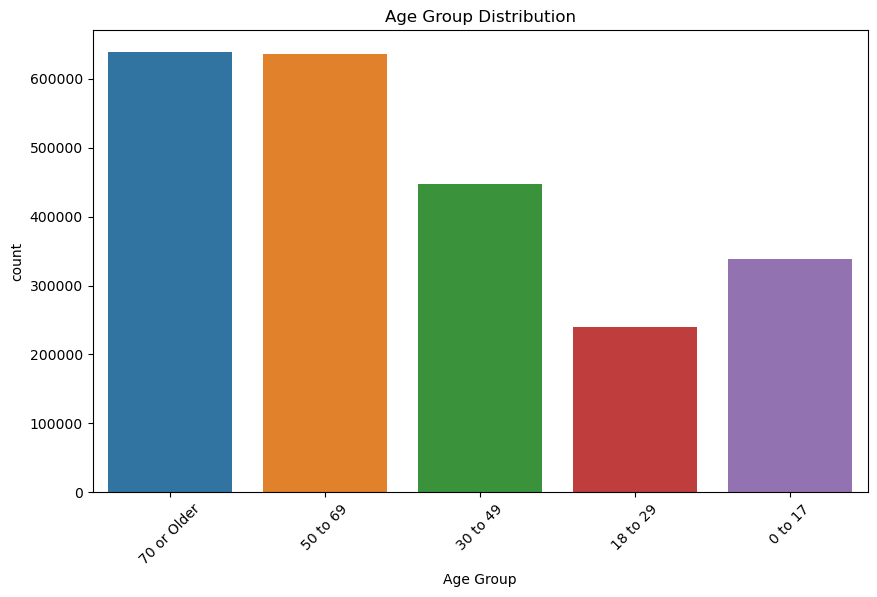

In [12]:
# Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

This plot reveals the patient distribution among different age groups. It offers insights into the age demographics of the dataset, which is essential for tailoring healthcare services to various age brackets.

### Gender Distribution

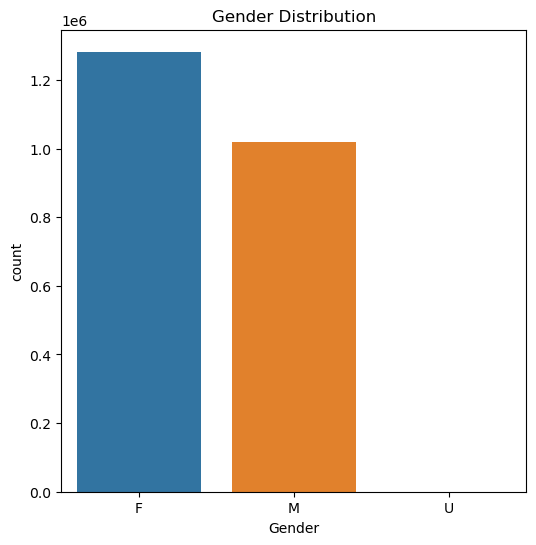

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

This chart provides a quick view of the gender distribution among patients, highlighting the gender balance in the dataset, which can be relevant for gender-specific healthcare analysis.

### Race Distribution

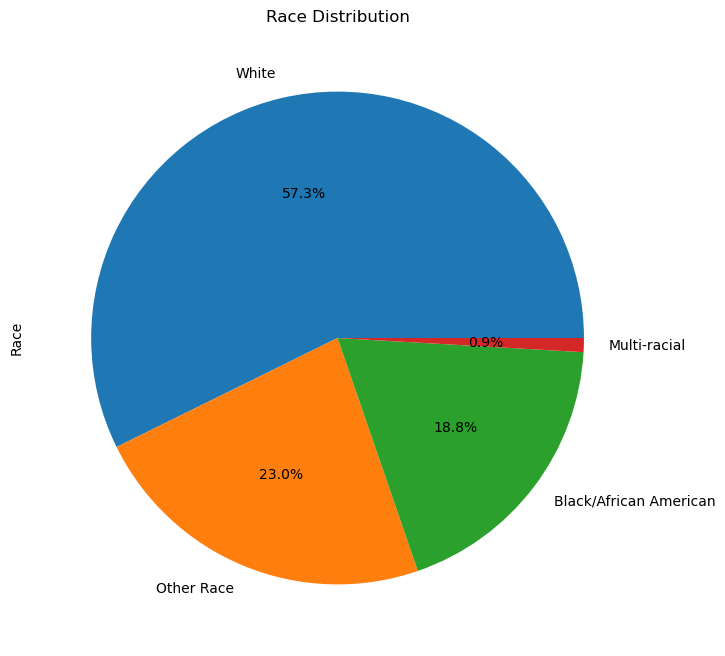

In [14]:
# Race Distribution
plt.figure(figsize=(8, 8))
df['Race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Race Distribution')
plt.show()

The pie chart showcases the diversity of patients by racial groups, offering insights into the dataset's racial composition, which is important for addressing healthcare disparities.

### Ethnicity Distribution

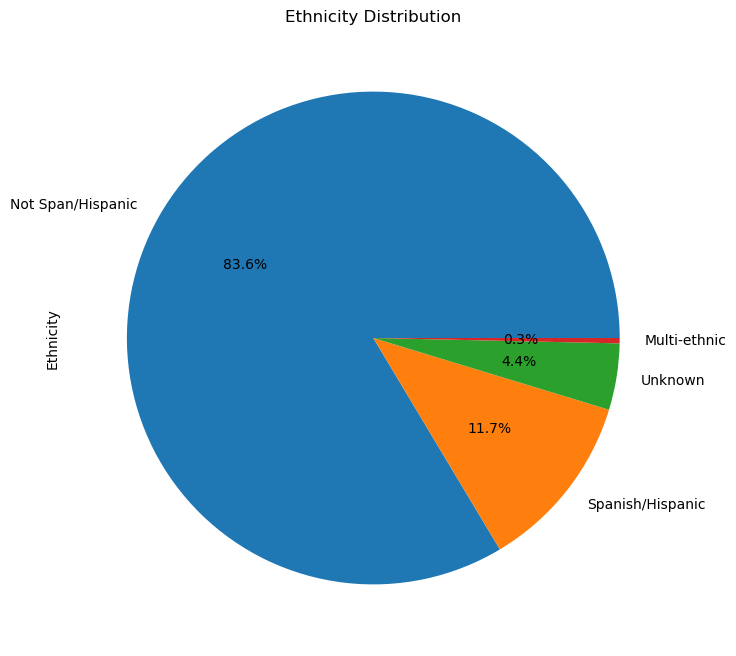

In [15]:
# Ethnicity Distribution
plt.figure(figsize=(8, 8))
df['Ethnicity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ethnicity Distribution')
plt.show()

Similar to the race distribution, this pie chart gives a snapshot of the dataset's ethnic composition, facilitating the understanding of patient ethnicity's role in healthcare.

### Average Length of Stay by Age Group

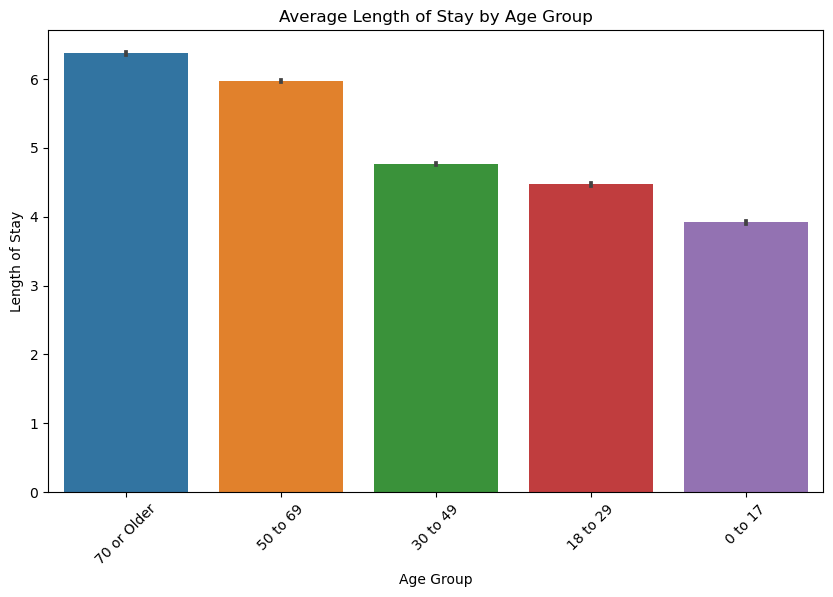

In [16]:
# Average Length of Stay by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Length of Stay', estimator=np.mean)
plt.title('Average Length of Stay by Age Group')
plt.xticks(rotation=45)
plt.show()

### Average Length of Stay by Gender

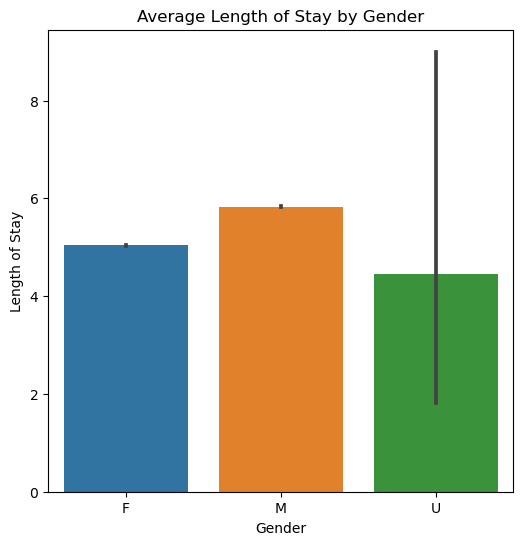

In [17]:
# Average Length of Stay by Gender
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Gender', y='Length of Stay', estimator=np.mean)
plt.title('Average Length of Stay by Gender')
plt.show()

Similar to the age group analysis, this plot examines the relationship between gender and the average length of hospital stays, helping identify any gender-related patterns.

### Correlation Heatmap

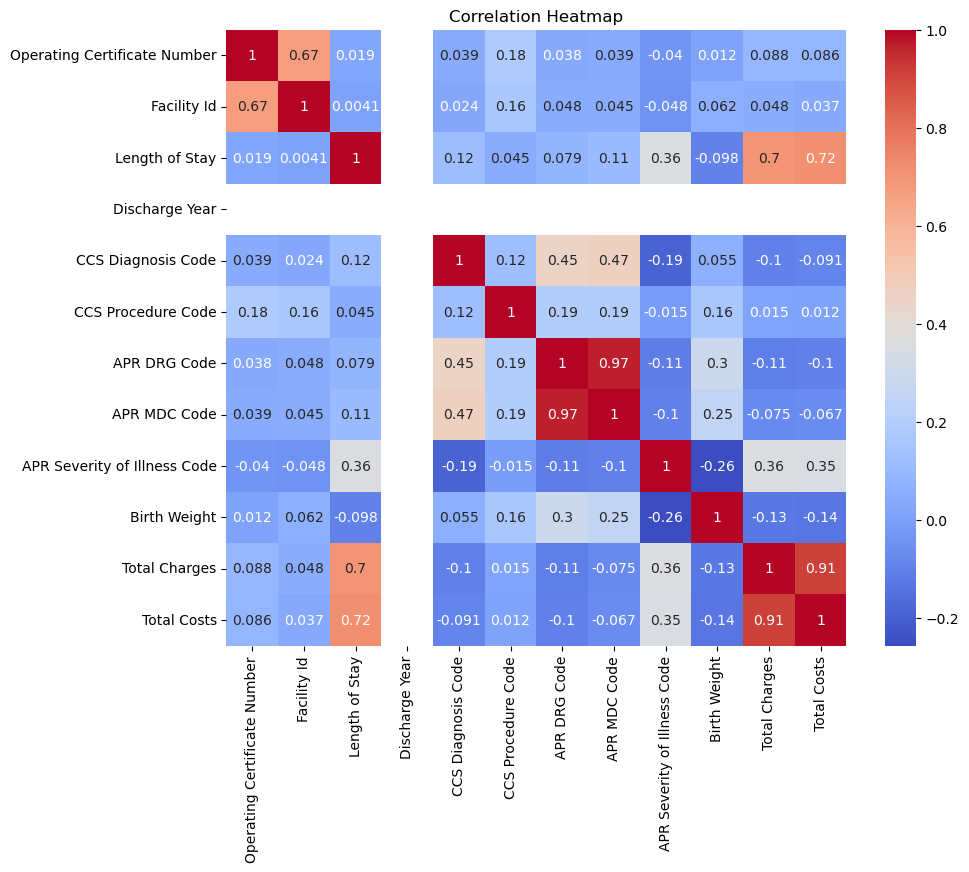

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Positive Correlations:*** Variables that have a positive correlation are shown in warmer colors, such as red or orange. In the heatmap, it appears that several pairs of variables exhibit positive correlations. These variables tend to increase or decrease together. For example, if one variable increases, the other tends to increase as well.

***Negative Correlations:*** Variables that have a negative correlation are shown in cooler colors, such as blue. Negative correlations indicate that as one variable increases, the other tends to decrease and vice versa. In the heatmap, there are some variables with negative correlations.

***Strength of Correlations:*** The numerical values inside each cell of the heatmap indicate the strength of the correlation between the corresponding pair of variables. Values close to 1 represent a strong positive correlation, while values close to -1 represent a strong negative correlation. Values close to 0 suggest a weak or no correlation between the variables.

***Variable Clusters:*** In the heatmap, you might notice clusters of variables that have similar patterns of correlation. These clusters can provide insights into groups of variables that are related to each other.

***Identifying Relationships:*** By examining the heatmap, you can identify which variables are strongly related and which ones are not. This information is valuable for understanding how changes in one variable might affect another.

Overall, the correlation heatmap helps in identifying and visualizing the relationships between variables, which is crucial for making informed decisions in data analysis and modeling. It can guide feature selection, reveal potential multicollinearity, and offer insights into the data's underlying structure.


### length of stay

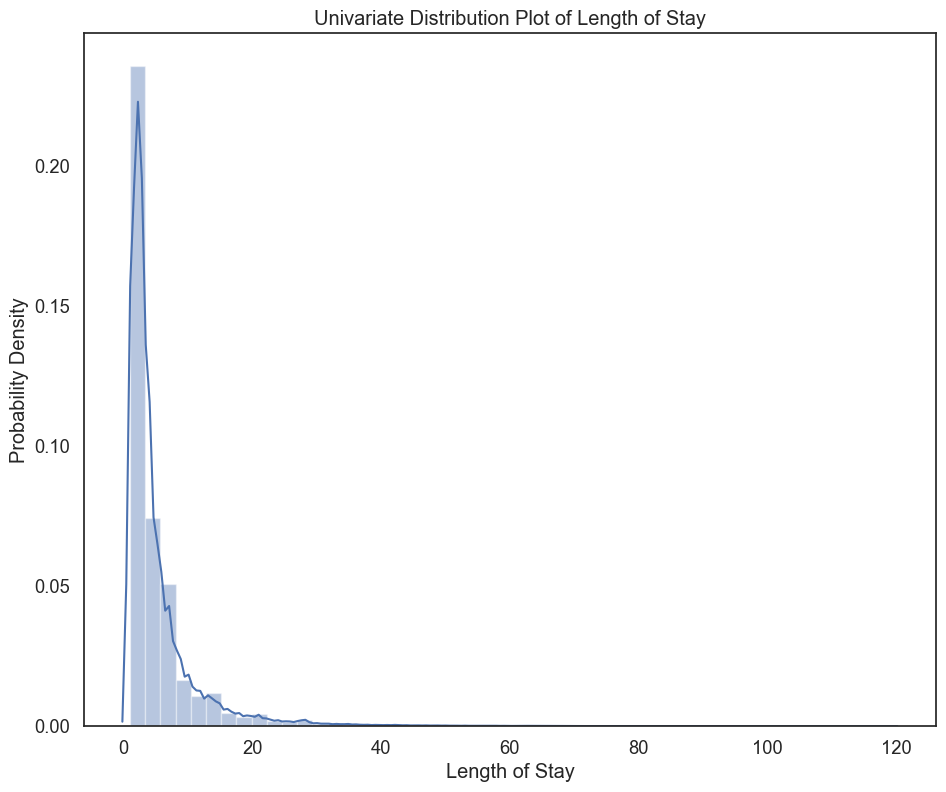

In [19]:

#lengty of stay
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Length of Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()


***Probability Density:*** The y-axis represents the probability density of the "Length of Stay." This is a way of showing how likely different values are within the dataset.

***Length of Stay Distribution:*** The main component of the plot is the histogram, which shows the distribution of "Length of Stay." The x-axis represents the different values of the variable (in this case, lengths of stay), and the height of each bar in the histogram indicates how frequently each value occurs in the dataset.

***Normality:*** From the plot, you can assess whether the distribution of "Length of Stay" is close to a normal distribution. In a normal distribution, the data would be symmetric and bell-shaped. Deviations from this shape may indicate non-normality.

***Summary Statistics:*** The plot provides an overall sense of the central tendency (mean or median) and spread (variance or standard deviation) of the "Length of Stay" data.

***Skewness and Kurtosis:*** You can also gain insights into the skewness (asymmetry) and kurtosis (tailedness) of the data distribution. Positive skewness indicates a longer tail on the right, while negative skewness means a longer tail on the left. Kurtosis describes how the distribution's tails compare to a normal distribution (leptokurtic or platykurtic).

Overall, the univariate distribution plot is a valuable tool for understanding the characteristics of a single variable. It can help identify data patterns, assess normality, and provide insights into the underlying data distribution.







### Lets see if we can confirm that there is data only input for the youngest age group

In [20]:
birth_weight_df = df[['Type of Admission', 'Birth Weight']].groupby('Type of Admission').mean()
weight_age_df = df[['Age Group', 'Birth Weight']].groupby('Age Group').mean()

# Concatenate the dataframes horizontally
combined_df = pd.concat([birth_weight_df, weight_age_df], axis=1)

# Display the combined dataframe
display(combined_df)

,Birth Weight,Birth Weight
Elective,4.855927,NaN
Emergency,10.065826,NaN
Newborn,3220.138452,NaN
Not Available,40.711806,NaN
Trauma,2.263969,NaN
Urgent,43.503948,NaN
0 to 17,NaN,2129.353015
18 to 29,NaN,0.000000
30 to 49,NaN,0.000000
50 to 69,NaN,0.000000


### Mean Birth Weight by Type of Admission:

Patients admitted for different reasons exhibit variations in mean birth weight.
Newborns have the highest mean birth weight, while patients admitted for "Emergency" reasons also have a relatively higher mean birth weight.

### Mean Birth Weight by Age Group:
Mean birth weight varies across different age groups.
The "70 or Older" age group has the highest mean birth weight, while the "0 to 17" age group has a lower mean birth weight.
These insights can be valuable for healthcare professionals, researchers, and policymakers interested in understanding the factors influencing birth weight in the context of different types of hospital admissions and patient age groups.

### Lets look at the relationship between birth weight and length of stay only for the newborns as this feature makes the most sense for this group

<Axes: xlabel='Birth Weight', ylabel='Length of Stay'>

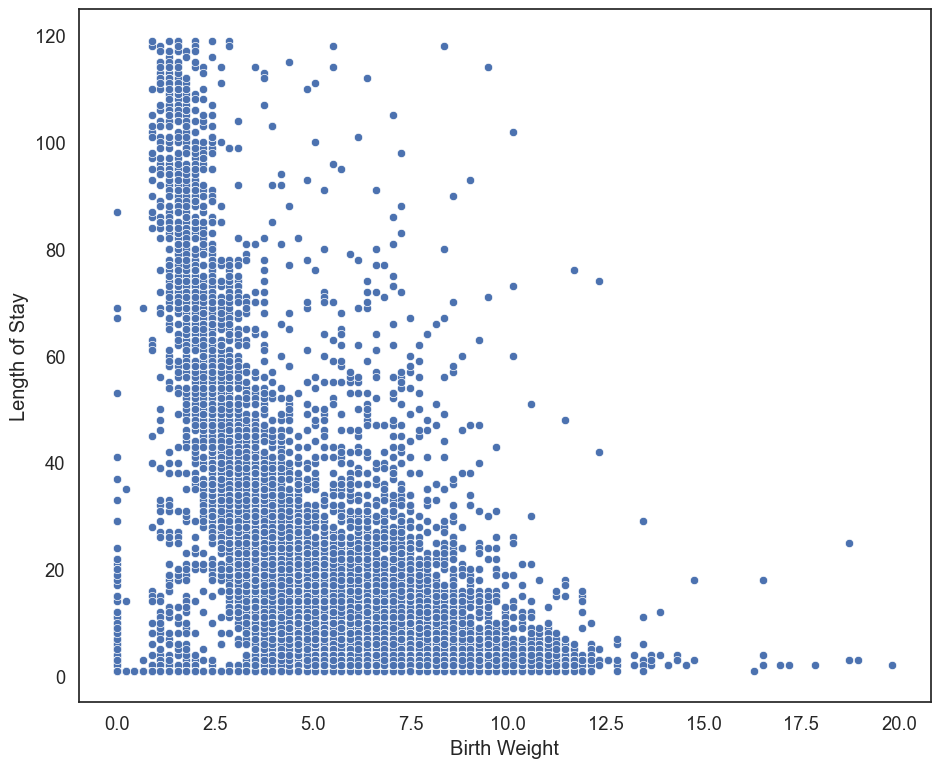

In [21]:

#Lets look at the relationship between birth weight and length of stay only for the newborns as this feature makes the most sense
#for this group

birth_youngest_stay = df[df['Type of Admission'].str.contains('Newborn')]
birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x="Birth Weight", y="Length of Stay",
                data=birth_youngest_stay)

***Data Selection:*** The code begins by filtering the dataset (df) to focus only on newborns. This is achieved by selecting rows where the 'Type of Admission' column contains the text 'Newborn'. This step ensures that the analysis is specific to newborns, as birth weight is especially relevant to this group.

***Data Transformation:*** In the following line of code, there is a conversion of the 'Birth Weight' column from grams to pounds. This transformation is performed by dividing the birth weight values by 454 (as there are approximately 454 grams in a pound). This step is taken to work with a more interpretable unit, which is pounds.

***Data Visualization:*** The code then proceeds to create a scatter plot using the seaborn library. The scatter plot visualizes the relationship between birth weight (in pounds) and the length of stay. The x-axis represents birth weight, and the y-axis represents the length of stay. Each point on the plot represents a newborn's birth weight and their corresponding length of stay in the hospital.

The scatter plot is a useful way to visually assess whether there is any correlation or pattern between a newborn's birth weight and their length of stay. It can help in identifying trends, such as whether lower birth weight infants tend to stay longer in the hospital or if there are any outliers in the data.

### Gender VS Length to stay

[(0.0, 30.0)]

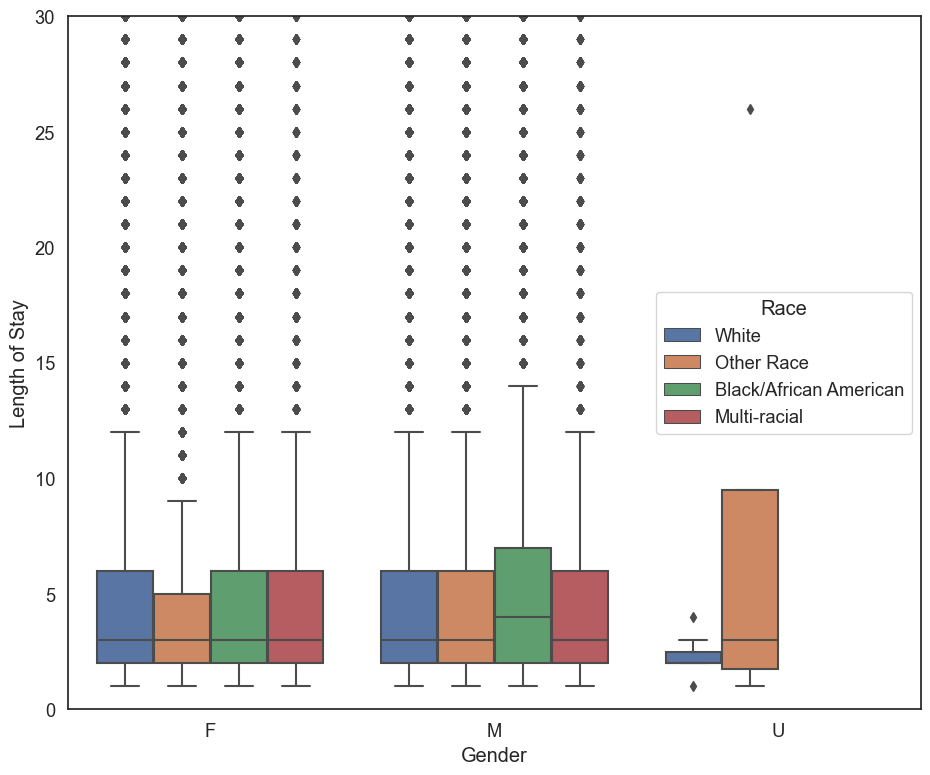

In [22]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=df)
ax.set(ylim=(0, 30))

***Data Visualization:*** The code creates a box plot using the seaborn library (sns.boxplot). A box plot is a statistical visualization tool that displays the distribution of a dataset, providing information about the central tendency, spread, and potential outliers.

***Box Plot Components:***

x-axis (Categorical Variable: Gender): The 'Gender' variable is plotted on the x-axis, which represents the categories "Male" and "Female."
y-axis (Numerical Variable: Length of Stay): The 'Length of Stay' variable is plotted on the y-axis, representing the number of days a patient stayed in the hospital.
Hue (Categorical Variable: Race): The 'Race' variable is used as a hue parameter. This means that the box plot distinguishes different categories of 'Race' by color, allowing you to see how 'Length of Stay' varies for each 'Gender' and 'Race' combination.

***Box Plot Interpretation:***

Box (Interquartile Range, IQR): The box represents the interquartile range (IQR), which contains the middle 50% of the data. The length of the box is a measure of the spread of 'Length of Stay' for each combination of 'Gender' and 'Race.'
Median Line: The horizontal line within each box represents the median value, indicating the central tendency of 'Length of Stay' for each group.

***Whiskers:*** The lines extending from the boxes (whiskers) show the range of the data, excluding outliers. Any data points outside the whiskers are considered potential outliers.

***Outliers:*** Individual data points beyond the whiskers are displayed as individual points, helping to identify extreme values.

***Y-Axis Limits:*** The code sets the y-axis limits using ax.set(ylim=(0, 30)). It restricts the visible range on the y-axis from 0 to 30. This is particularly useful for focusing on the 'Length of Stay' values within this specified range.

The box plot enables you to visually compare the distribution of 'Length of Stay' for different combinations of 'Gender' and 'Race.' You can identify whether there are significant differences in the 'Length of Stay' between gender groups, racial categories, or specific gender-race combinations. It also helps identify any potential outliers that fall outside the whiskers, indicating extreme values. This analysis can provide insights into the relationship between 'Gender,' 'Race,' and 'Length of Stay' in your healthcare dataset.

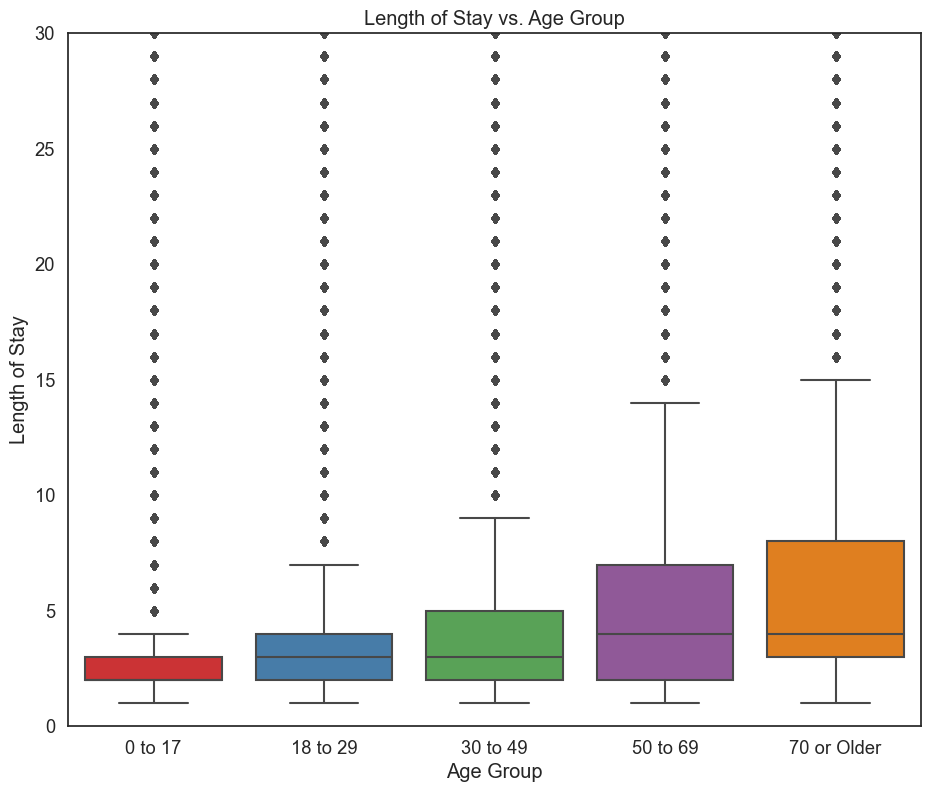

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set1", data=df)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

In [24]:
### Length of Stay vs. Patient Race

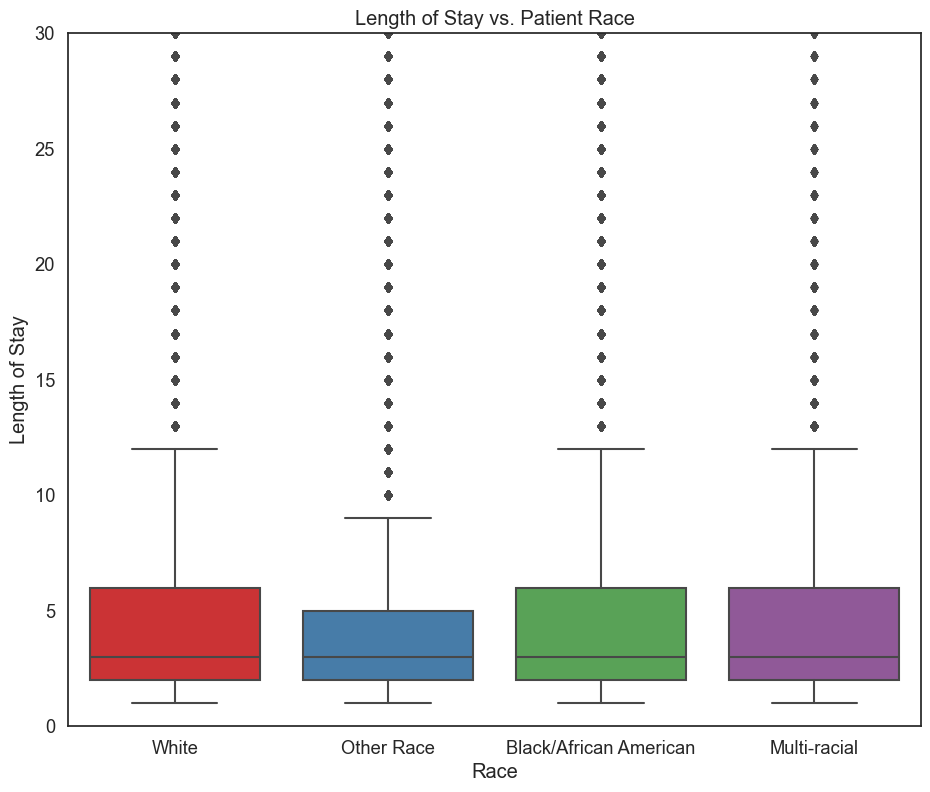

In [25]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=df, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

***Variation in Length of Stay by Gender and Race:***

The box plot effectively illustrates the variation in 'Length of Stay' for different combinations of 'Gender' and 'Race.'
Each combination of 'Gender' and 'Race' is represented by a separate box and whisker plot.
***Median Length of Stay:***

The central line within each box represents the median 'Length of Stay' for the corresponding group.
***Observations:***

For some groups, such as 'Females of White race' and 'Males of White race,' the median length of stay appears higher compared to other groups.
Interquartile Range (IQR):

The box spans the interquartile range (IQR), indicating the middle 50% of data for each group.

***Observations:***

Some groups have a wider IQR, indicating greater variability in 'Length of Stay' within those categories.

***Whiskers:***

Whiskers extend from the boxes and represent the range of data, excluding outliers.

***Observations:***

Whiskers' lengths vary across different groups, showing differences in the range of 'Length of Stay.'

***Outliers:***

Outliers, if present, are displayed as individual data points outside the whiskers.
Observations:
Outliers are visible in some groups, suggesting extreme values in 'Length of Stay' for specific 'Gender' and 'Race' 
combinations.

***Y-Axis Limit:***

The y-axis is limited to a range of 0 to 30, focusing on the 'Length of Stay' within this specific range.

***Observations:***
This limit helps in zooming in on 'Length of Stay' values while excluding extremely high values, making it easier to compare the central tendencies and variation.

***Race-Based Analysis:***

By including 'Race' as a hue, the plot enables a detailed examination of 'Length of Stay' variations within each 'Gender' category.
Observations:
For example, it shows how 'Length of Stay' varies among different racial groups within each gender.
Potential Insights:

The plot suggests that 'Gender' and 'Race' may play a role in the distribution of 'Length of Stay' for patients.
It highlights the presence of variations, both in central tendencies and spread, across different groups.
Outliers may be indicative of unique cases with exceptionally long or short 'Length of Stay.'
Overall, the box plot allows for a comprehensive visual analysis of how 'Gender' and 'Race' relate to the length of a patient's stay in the hospital. It provides a clear understanding of the distribution of 'Length of Stay' across various gender-race combinations and identifies groups with distinct patterns. These insights are valuable for identifying potential disparities or factors influencing hospital stays within the dataset.

### CCS Diagnosis Description Group BY Length of Stay

In [26]:

diag_stay_df = df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_stay_df = diag_stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(diag_stay_df)

,CCS Diagnosis Description,Length of Stay
0,Short gestation; low birth weight; and fetal g...,29.276808
1,Respiratory distress syndrome,21.706667
2,Tuberculosis,20.251546
3,Leukemias,19.025632
4,Schizophrenia and other psychotic disorders,16.205136
...,...,...
254,Nonspecific chest pain,2.081811
255,Acute and chronic tonsillitis,1.870349
256,Medical examination/evaluation,1.858553
257,Prolapse of female genital organs,1.688921


***Variation in Length of Stay by Diagnosis:***

The table lists unique medical diagnosis descriptions (CCS Diagnosis Description) and their corresponding mean 'Length of Stay' in ascending order.
It allows us to identify which medical diagnoses are associated with longer or shorter hospital stays on average.

***Average Length of Stay:***

The 'Length of Stay' values represent the average number of days patients with each diagnosis spend in the hospital.
Some diagnoses have notably higher average lengths of stay, while others have shorter stays.

***Diagnostic Categories:***

By grouping diagnoses, the table reveals which medical categories or conditions generally require more extended hospitalization.

***Insights for Healthcare Planning:***

These insights are valuable for healthcare providers and planners in understanding the resource allocation and planning for patients with specific medical conditions.
For example, diagnoses with longer lengths of stay may require more hospital beds, staff, and resources.

***Quality of Care and Outcomes:***

Longer lengths of stay for specific diagnoses might suggest more severe cases or complications.
It can also be an indicator of the effectiveness of care and treatment outcomes for different medical conditions.

***Further Analysis:***

This information can be further analyzed to investigate the factors contributing to the variations in length of stay for different diagnoses.
By sorting the table in ascending order based on the mean 'Length of Stay,' it is easier to identify which medical conditions are associated with longer hospital stays on average. These insights are valuable for healthcare planning and decision-making, as well as for understanding patient outcomes and resource allocation within the hospital setting.

### Top 5 Diagnoses with Longest Average Length of Stay

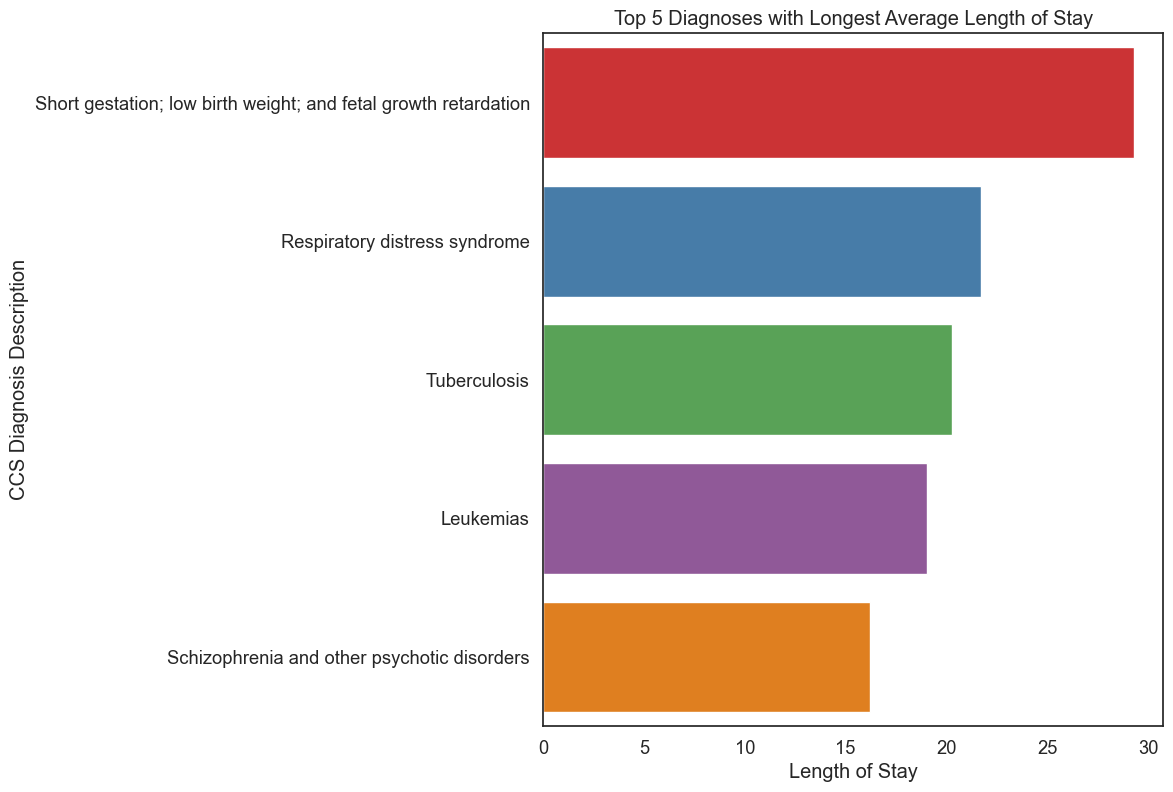

In [27]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diag_stay_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

***Visualizing the Top 5 Diagnoses:*** The bar plot displays the top 5 medical diagnoses (CCS Diagnosis Description) with the longest average length of stay.

***Length of Stay Variation:*** The lengths of stay are represented on the x-axis. This insight highlights the differences in the average duration patients with these specific diagnoses spend in the hospital.

***Prioritizing Resource Allocation:*** This visualization is valuable for healthcare administrators and planners as it identifies the medical conditions that tend to require more hospital resources and patient care time.

***Treatment Complexity:*** Diagnoses with longer stays could indicate more complex or severe cases that need extended hospitalization.

***Resource Optimization:*** Hospitals can use these insights to allocate resources, staff, and facilities more effectively based on the expected length of stay for patients with these diagnoses.

***Quality of Care and Outcomes:*** Longer stays may also reflect a focus on ensuring the highest quality of care for patients.

***Potential for Further Analysis:*** These insights can be the starting point for deeper analysis to understand the factors contributing to longer stays and optimize patient care.

***Palette Choice:*** The 'Set1' color palette enhances the visual appeal and makes it easy to distinguish between different diagnoses.

***Titles and Labels:*** The title and labels on the plot provide context and make it more accessible to the audience.

By visualizing the diagnoses with the longest average lengths of stay, healthcare professionals can make informed decisions about resource allocation, quality of care, and patient outcomes in the hospital.

### CCS Diagnosis Description Group By Total Costs

In [28]:
diag_costs_df = df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_costs_df = diag_costs_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(diag_costs_df)

,CCS Diagnosis Description,Total Costs
0,Leukemias,72394.850938
1,Short gestation; low birth weight; and fetal g...,58638.485885
2,Heart valve disorders,55436.293487
3,Hodgkin`s disease,51827.424047
4,Respiratory distress syndrome,47709.956444
...,...,...
254,Other pregnancy and delivery including normal,5747.430548
255,Liveborn,5564.611084
256,Adjustment disorders,4945.246402
257,Medical examination/evaluation,4244.034013


***Cost Variation:*** The DataFrame provides a list of medical diagnoses and their corresponding average total costs. This insight highlights the differences in the financial aspects associated with each diagnosis.

***Financial Resource Allocation:*** Healthcare administrators and financial planners can use this information to allocate resources effectively, as conditions with higher average costs may require more funding and financial planning.

***Economic Impact:*** Diagnoses with higher average costs may have a significant economic impact on the healthcare system. Understanding these costs can help in budgeting and financial management.

***Cost-Efficiency Analysis:*** Hospitals and healthcare organizations can use these insights to assess the cost-efficiency of treatments and interventions for specific diagnoses.

***Treatment Decision-Making:*** It provides information that can be used to make informed decisions about treatment protocols, resource allocation, and healthcare services based on the cost implications of specific diagnoses.

***Data Sorting:*** The DataFrame is sorted in descending order based on total costs, allowing for easy identification of diagnoses with the highest financial burden.

***Resource Optimization:*** Hospitals can optimize resource allocation, staff training, and financial planning to address the specific needs of patients with higher-cost conditions.

***Potential for Further Analysis:*** These insights can serve as a foundation for deeper analysis to understand the factors contributing to the total costs and explore ways to manage and reduce expenses effectively.

***Data Presentation:*** The use of the Pandas DataFrame and sorting by total costs provides a structured and clear representation of the cost insights.

By examining the average total costs associated with various medical diagnoses, healthcare professionals and administrators can gain a better understanding of the financial implications of different conditions, which is crucial for strategic decision-making and resource management within the healthcare system.

### Length of Stay vs. Health Service Area

Text(0.5, 1.0, 'Length of Stay vs. Health Service Area')

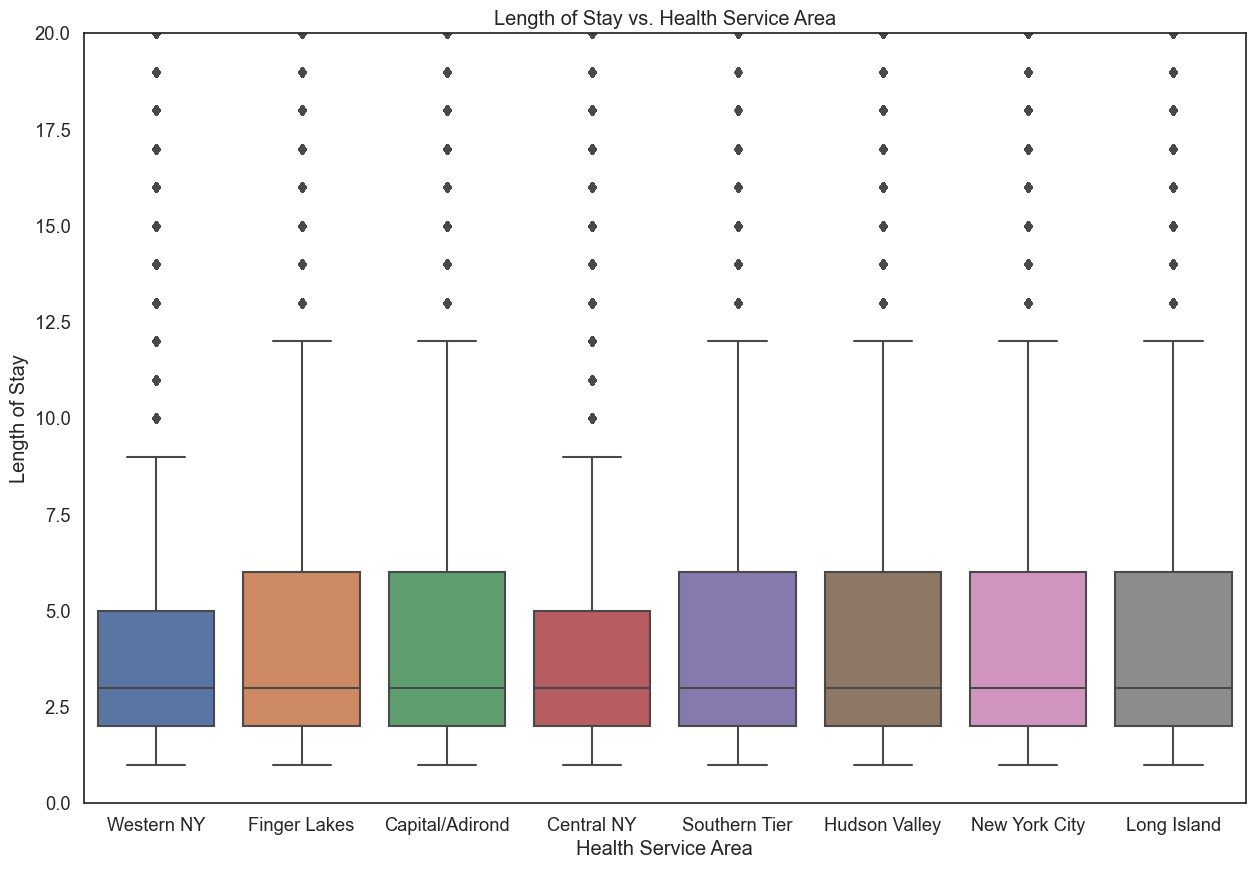

In [29]:
f, ax = plt.subplots(figsize=(15,10 ))
sns.boxplot(x="Health Service Area", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))
plt.title('Length of Stay vs. Health Service Area')

***Variation in Length of Stay:*** The box plot visually represents the distribution of the length of stay for patients across various health service areas. It highlights the differences in the average length of stay between different regions.

***Regional Comparisons:*** Healthcare administrators can use this visualization to compare the performance and efficiency of healthcare facilities in different service areas. Facilities with longer or shorter stays can be identified.

***Potential Service Improvements:*** Higher median lengths of stay in specific areas may indicate areas where improvements in healthcare delivery and efficiency are needed.

***Data Limitations:*** It's important to consider that other factors, such as patient demographics or medical conditions, can influence the length of stay. Further analysis may be required to isolate the regional impact.

***Resource Allocation:*** Hospitals and healthcare systems can use these insights to allocate resources effectively based on the expected length of patient stays in different areas.

***Visualization Clarity:*** The box plot provides a clear and concise visualization of the data, making it easy to identify variations and trends in length of stay.

***Data Filtered by Area:*** The analysis is segmented by health service areas, allowing for a more focused examination of how different regions compare.

***Y-Axis Limit:*** The y-axis limit is set to a maximum of 20, providing a consistent scale for easy comparison.

### Length of Stay vs. Severity of Illness

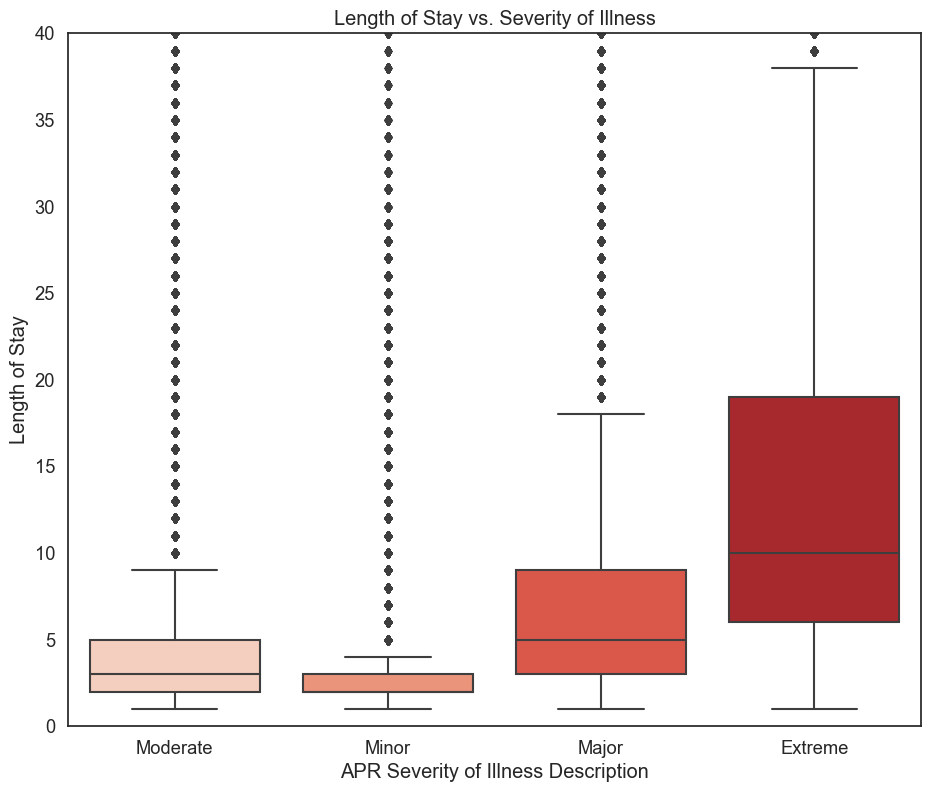

In [30]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

***Impact of Severity on Length of Stay:*** The box plot clearly illustrates the influence of the severity of illness on the length of a patient's stay. As the severity of illness increases, the median length of stay tends to rise, indicating that more severe cases often require longer hospitalization.

***Identifying Outliers:*** The plot identifies potential outliers, which are data points that fall significantly outside the typical range of lengths of stay. This can help in identifying cases that may require special attention, further evaluation, or interventions.

***Distribution of Stay Length:*** The plot provides a visual representation of how the length of stay is distributed for different levels of illness severity. The boxes show the interquartile range, while the whiskers indicate the range of typical values. Any data points beyond the whiskers are potential outliers.

***Resource Allocation:*** Hospitals and healthcare facilities can utilize this insight to allocate resources more effectively based on the expected length of stay for patients with different severity levels.

***Improved Patient Care:*** It highlights the importance of providing appropriate care and support to patients with higher severity of illness, as they tend to require longer hospital stays.

***Clinical Decision-Making:*** Clinicians can use this information to make informed decisions about treatment, patient monitoring, and discharge planning based on the expected length of stay associated with the severity of illness.

***Visualization Clarity:*** The box plot offers a clear and concise visualization that makes it easy to compare the distribution of stay lengths across different levels of illness severity.

***Y-Axis Limit:*** The y-axis limit is set to a maximum of 40, allowing for a consistent scale to facilitate comparison.

### Length of Stay vs. Type of Admission

Text(0.5, 1.0, 'Length of Stay vs. Type of Admission')

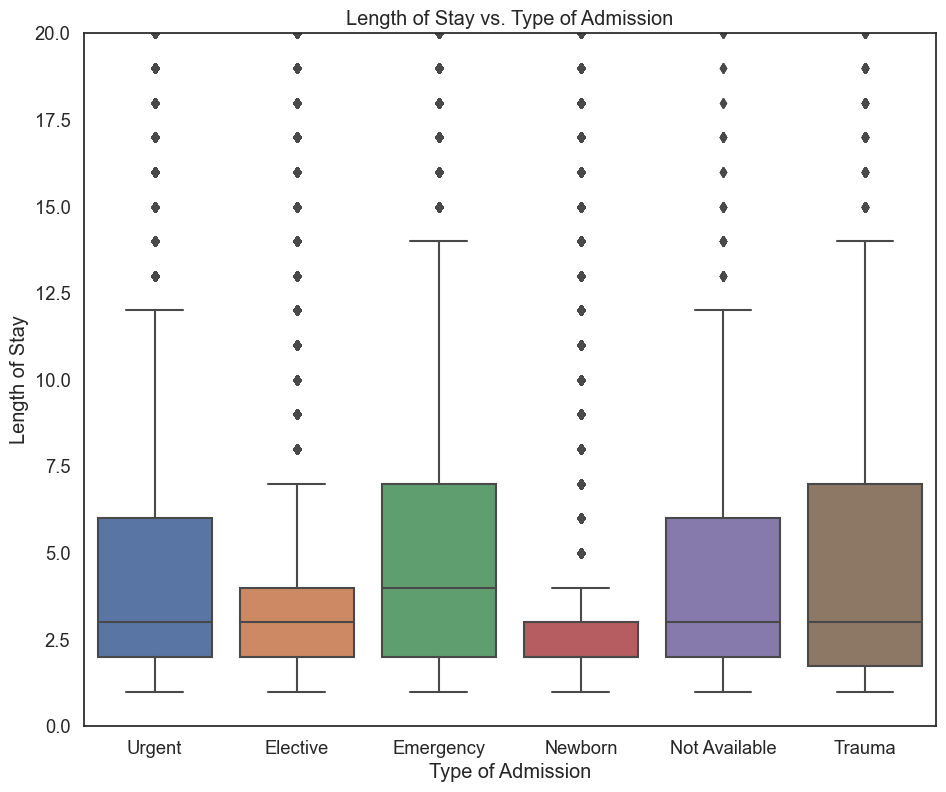

In [31]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))
plt.title('Length of Stay vs. Type of Admission')

***Impact of Admission Type on Length of Stay:*** The box plot clearly demonstrates how the type of admission affects the length of a patient's hospital stay. It shows distinct differences in the distribution of length of stay based on the admission type.

***Emergency Admissions:*** Patients admitted as emergencies (marked as "Emergency" on the x-axis) tend to have a wider range of length of stay, with some outliers indicating unusually long stays. This suggests that emergencies can result in both short and long hospitalizations.

***Elective Admissions:*** Elective admissions (labeled as "Elective" on the x-axis) exhibit a more concentrated range of stay lengths, with fewer outliers. This implies that planned admissions typically result in more predictable and consistent lengths of stay.

***Urgent Admissions:*** Patients with urgent admissions (represented as "Urgent" on the x-axis) show a moderate range of stay lengths, falling between emergency and elective admissions. The box plot helps in visualizing this variation.

***Resource Planning:*** Healthcare facilities can utilize this insight to plan resources effectively, considering the expected length of stay for different types of admissions. For instance, emergency cases may require a flexible approach to accommodate a wide range of stay lengths.

***Enhanced Care Coordination:*** The data underscores the importance of tailored care and support based on the type of admission. Emergency admissions may require more intensive care and monitoring.

***Clinical Decision-Making:*** Clinicians can use this information to make informed decisions regarding patient care, treatment planning, and discharge management based on the anticipated length of stay associated with the admission type.

***Clarity of Visualization:*** The box plot offers a clear and concise visualization of the distribution of stay lengths for different admission types.

***Y-Axis Limit:*** The y-axis limit is set to a maximum of 20, allowing for consistent scaling to facilitate comparison.

This visualization assists healthcare professionals, administrators, and policymakers in understanding how the type of admission influences the length of hospital stays. It supports better resource allocation, improved patient care, and data-driven clinical decision-making based on admission type.

# **Wordclouds**
In this section, I perform text parsing and analysis on diagnosis descriptions, followed by the creation of wordclouds to visualize these results. From this analysis, we can see stark differences in the diagnosis descriptions for each illness severity type. These differences are interesting to compare, and some of the results are summarized below:

Minor Illness: Pregnancy, disease, liveborn, complications, osteoarthritis
Moderate Illness: Schizophrenia, disease, complications, psychotic
Major Illness: Failure, disorders, acute
Extreme Illness: Septicemia, cerebrovascular, tuberculosis

[nltk_data] Downloading package stopwords to C:\Users\Abid
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


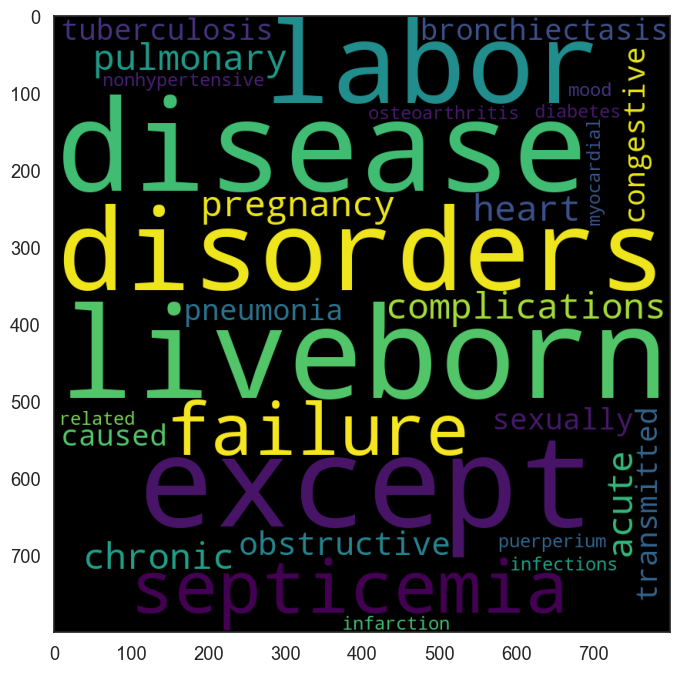

In [34]:
#Let's take a look at the most common diagnosis descriptions. There is a lot of data here so lets limit the entires we look at
diagnosis_desc_df = df[['CCS Diagnosis Description']][0:10000]
diagnosis_desc_df['CCS Diagnosis Description'] = diagnosis_desc_df['CCS Diagnosis Description'].astype('str', errors = 'ignore')
diagnosis_desc_df['CCS Diagnosis Description'] = diagnosis_desc_df['CCS Diagnosis Description'].apply(lambda x: x.lower())

list_of_titles = []
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
diagnosis_desc_df['Tokens'] = diagnosis_desc_df['CCS Diagnosis Description'].apply(lambda x: tokenizer.tokenize(x))
list_of_tokens = diagnosis_desc_df['Tokens'].tolist()
diagnosis_words = []
for sublist in list_of_tokens:
    for item in sublist:
        diagnosis_words.append(item)

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

#Let's remove stop words as well, such as "a", "and", and "the"
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
for word in list(diagnosis_words):
    if word in stop_words:
        diagnosis_words.remove(word)

from collections import Counter
Counter1 = Counter(diagnosis_words)
most_occur = Counter1.most_common(30)
diagnosis_counter = []
for item in most_occur:
  diagnosis_counter.append(item[0])

#Create word cloud plot
cloud_words = ' '
for words in diagnosis_counter:
    cloud_words = cloud_words + words + ' '

diagnosis_word_plot = WordCloud(width = 800, height = 800).generate(cloud_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(diagnosis_word_plot)
plt.show()

***Data Preparation:*** The code starts by extracting a subset of the dataset containing the 'CCS Diagnosis Description' column. It limits the entries to the first 10,000 rows to manage the amount of data.

***Data Cleaning and Tokenization:***

It converts the text in the 'CCS Diagnosis Description' column to lowercase.
Tokenization is performed using the RegexpTokenizer from the NLTK library, which breaks down text into individual words, removing punctuation and special characters.

***Stop Word Removal:***

It downloads and uses NLTK's English stop words set, which includes common words like "a," "and," and "the."
The code then removes these stop words from the tokenized list of words.

***Word Frequency Count:***

The code calculates the frequency of each word in the dataset using Python's Counter class. It identifies the 30 most frequently occurring words.

***Word Cloud Generation:***

A word cloud is created using the most common words found in the diagnosis descriptions.
The size of each word in the word cloud is determined by its frequency, with more frequent words appearing larger.
Display Word Cloud: The code displays the word cloud plot, providing a visual representation of the most common terms in the diagnosis descriptions.

In summary, this code helps visualize the most frequently used terms in the 'CCS Diagnosis Description' column of the dataset. It provides a quick and intuitive way to identify common diagnoses or medical conditions based on the dataset. This type of visualization can be valuable for understanding the focus of the healthcare data and gaining insights into prevalent medical issues.

### Minor

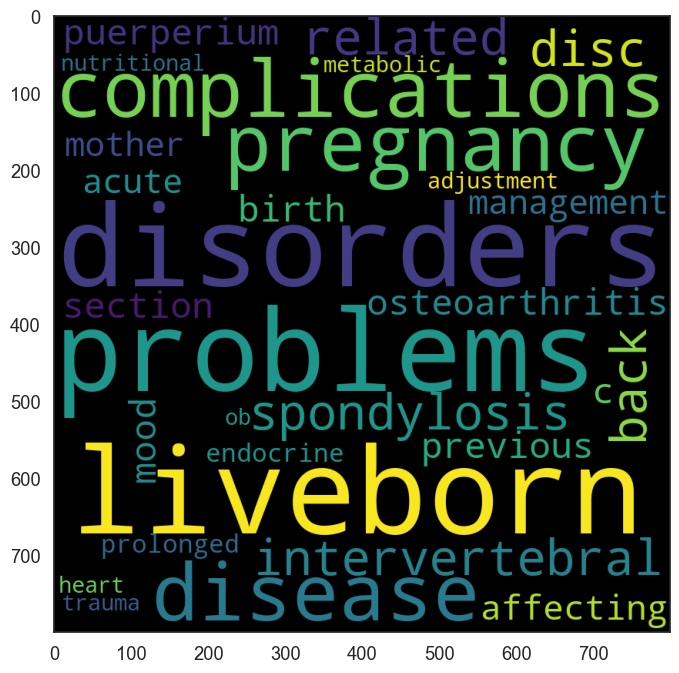

In [35]:
#Minor
df['CCS Diagnosis Description'] = df['CCS Diagnosis Description'].astype('str', errors = 'ignore')
df['CCS Diagnosis Description'] = df['CCS Diagnosis Description'].apply(lambda x: x.lower())
minor_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Minor']
minor_df = minor_df[['CCS Diagnosis Description']][0:40000]

#lets create a function for this
def generate_cloud(type_df):
  list_of_titles = []
  from nltk.tokenize import RegexpTokenizer
  tokenizer = RegexpTokenizer(r'\w+')
  type_df['Tokens'] = type_df['CCS Diagnosis Description'].apply(lambda x: tokenizer.tokenize(x))
  list_of_tokens = type_df['Tokens'].tolist()
  type_words = []
  for sublist in list_of_tokens:
      for item in sublist:
          type_words.append(item)

  for word in list(type_words):
    if word in stop_words:
        type_words.remove(word)

  Counter1 = Counter(type_words)
  most_occur = Counter1.most_common(30)
  diagnosis_counter = []
  for item in most_occur:
    diagnosis_counter.append(item[0])

  from wordcloud import WordCloud
  #Create word cloud plot
  cloud_words = ' '
  for words in diagnosis_counter:
      cloud_words = cloud_words + words + ' '

  type_word_plot = WordCloud(width = 800, height = 800).generate(cloud_words)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(type_word_plot)
  plt.show()

generate_cloud(minor_df)


In [36]:
### Moderate

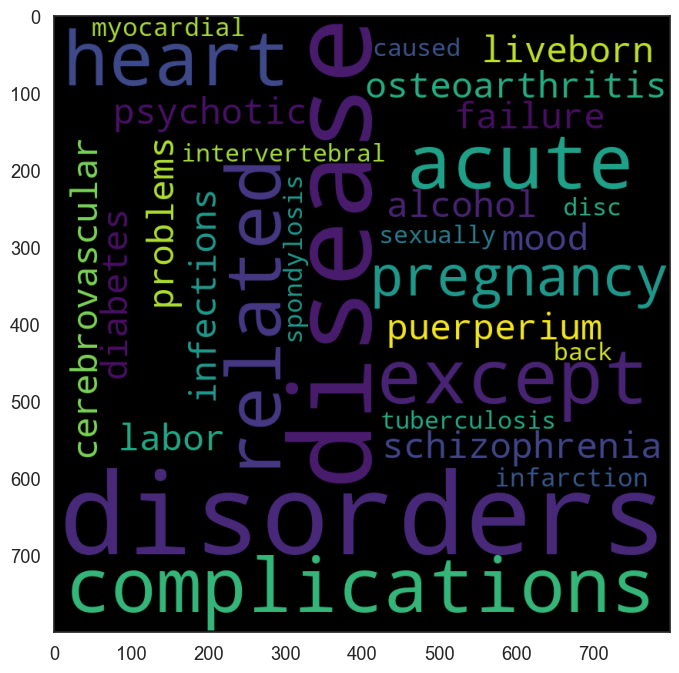

In [37]:
moderate_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Moderate']
moderate_df = moderate_df[['CCS Diagnosis Description']][0:40000]
generate_cloud(moderate_df)

### Major

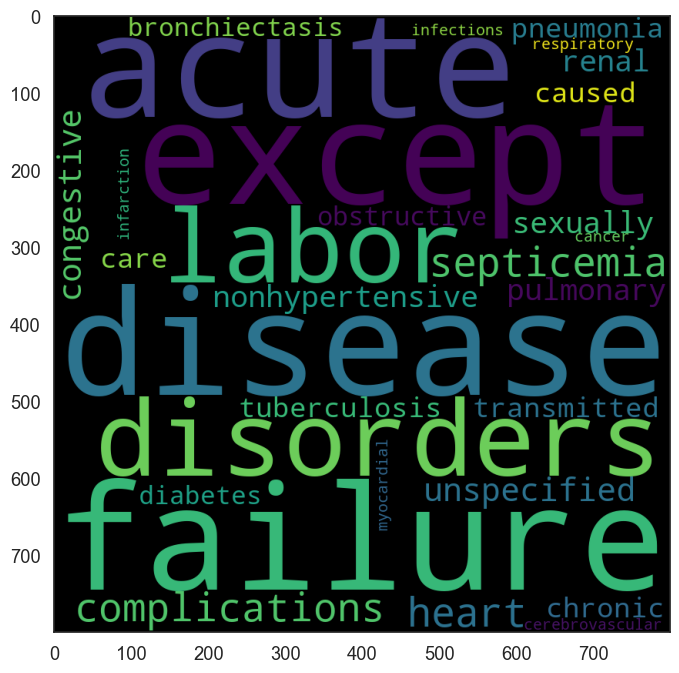

In [38]:

major_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Major']
major_df = major_df[['CCS Diagnosis Description']][0:40000]

generate_cloud(major_df)

### Extreme

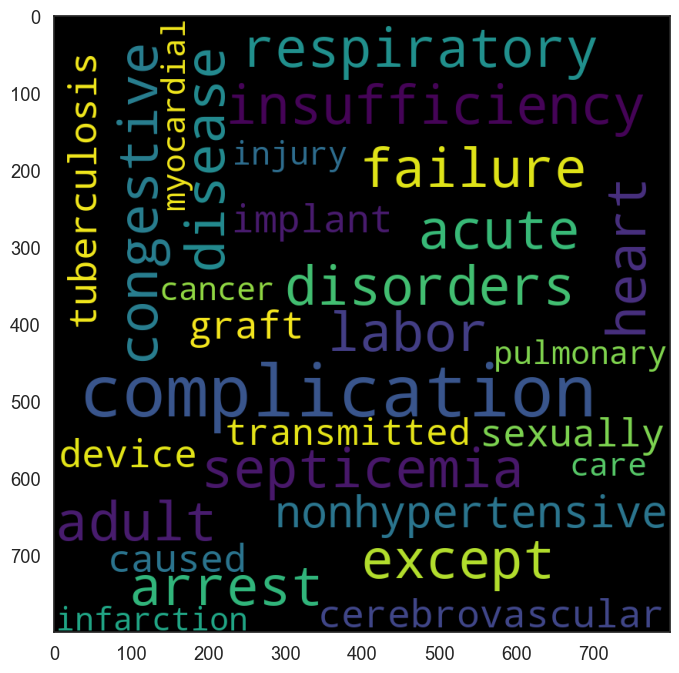

In [39]:

extreme_df = df[['CCS Diagnosis Description']][df['APR Severity of Illness Description']=='Extreme']
extreme_df = extreme_df[['CCS Diagnosis Description']][0:40000]

generate_cloud(extreme_df)

# **Drop Columns**
Now, in preparation for the modeling component of this project and following the data visualization section where I used some of these columns, I will now drop all the columns that won't help our model predict length of stay. In this section, I end up dropping the following columns:

Zip Code

Facility Name

CCS Diagnosis Description

CCS Procedure Description

APR DRG Description

Hospital County

APR MDC Description

Discharge Year

Operating Certificate Number

Ethnicity

Birth Weight

APR Severity of Illness Description

Attending Provider License Number

Patient Disposition

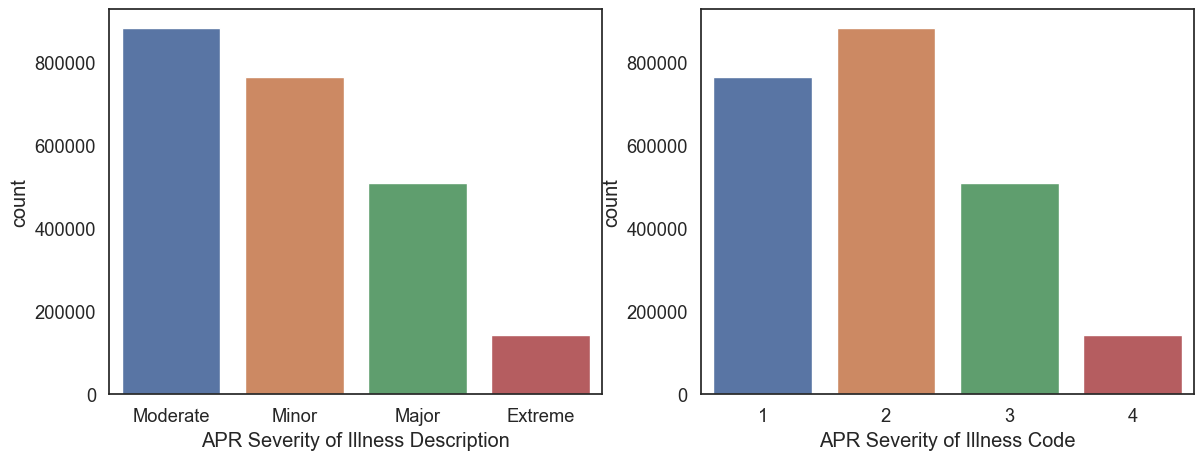

In [40]:
#Finally, lets drop the columns the rest of the columns we won't need for the modeling portion

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x='APR Severity of Illness Description', data=df, ax=ax[0])
sns.countplot(x='APR Severity of Illness Code', data=df, ax=ax[1])
plt.show()
df = df.drop(['APR Severity of Illness Description'], axis=1)  #after confirming the illness code column encodes the same

***Countplot Visualization:*** It creates a figure with two subplots arranged side by side, each containing a countplot using Seaborn. The countplots display the distribution of data for two different columns in the dataset.

The first countplot (ax[0]) shows the distribution of data for the 'APR Severity of Illness Description' column. It counts the occurrences of each category within this column.

The second countplot (ax[1]) shows the distribution of data for the 'APR Severity of Illness Code' column, similarly counting the occurrences of each code within this column.

***Display Plot:*** After creating the countplot visualizations, it displays the figure containing both subplots.

***Column Removal:***
 Following the visualization, the code removes the 'APR Severity of Illness Description' column from the dataset. This removal is based on the observation that the 'APR Severity of Illness Code' column encodes similar information. By retaining one column and dropping the other, the code reduces redundancy in the dataset.

In summary, this code first provides visual insights into the distribution of data within the 'APR Severity of Illness Description' and 'APR Severity of Illness Code' columns. After confirming that the 'APR Severity of Illness Code' effectively encodes the same information, it removes the 'APR Severity of Illness Description' column to simplify the dataset and eliminate redundancy. This column removal is a common step in data preprocessing when working with machine learning models, as it helps reduce dimensionality and focus on relevant features.

In [41]:
num_county = df['Hospital County'].unique().tolist()
num_zip = df['Zip Code - 3 digits'].unique().tolist()
print("Number of Hospital County's:",len(num_county))
print("Number of Zipcodes:",len(num_zip))
#Below, we can see hospital county and zipcode do not encode same info.

Number of Hospital County's: 57
Number of Zipcodes: 50


This code first extracts the unique values from the 'Hospital County' and 'Zip Code - 3 digits' columns and converts them into lists. Then, it prints the number of unique hospital counties and the number of unique zip codes. The comment at the end indicates that the two columns, 'Hospital County' and 'Zip Code,' do not contain the same information. This observation suggests that these columns serve different purposes or provide distinct data in the dataset

In [42]:
num_facilities = df['Facility Id'].unique().tolist()
num_facname = df['Facility Name'].unique().tolist()
print("Number of Facility Ids:",len(num_facilities))
print("Number of Facility Names:",len(num_facname))

Number of Facility Ids: 213
Number of Facility Names: 223


In this code, the unique values from the 'Facility Id' and 'Facility Name' columns are extracted and converted into lists. The code then prints the number of unique Facility Ids and Facility Names. The comment indicates that the data shows a similar number of unique Facility Ids and Facility Names. This suggests that these two columns might encode similar information but with some variations in the names. As a result, the decision is made to drop the 'Facility Name' column to simplify the dataset, assuming that 'Facility Id' is sufficient for identification purposes.

In [43]:

#We can see that these most likely encode the same info even though they are on off, so I will drop the names column

num_diag_code = df['CCS Diagnosis Code'].unique().tolist()
num_diag_desc = df['CCS Diagnosis Description'].unique().tolist()
print("Number of Diagnosis Codes:",len(num_diag_code))
print("Number of Diagnosis Descriptions:",len(num_diag_desc))

Number of Diagnosis Codes: 259
Number of Diagnosis Descriptions: 259


In this code, the unique values from the 'CCS Diagnosis Code' and 'CCS Diagnosis Description' columns are extracted and converted into lists. The code then prints the number of unique Diagnosis Codes and Diagnosis Descriptions. The comment suggests that the counts of unique values in both columns are similar, implying that they encode the same information. Consequently, it's decided to drop the 'CCS Diagnosis Description' column, as the 'CCS Diagnosis Code' column is considered sufficient for representing the diagnosis information.

In [44]:

#I want to see a list of the possible descriptions since many of them say NO PROC. Below is the output
#Lets verify the procedure code encodes the same info and then drop this column

num_proc_code = df['CCS Procedure Code'].unique().tolist()
num_proc_desc = df['CCS Procedure Description'].unique().tolist()
print("Number of Procedure Codes:",len(num_proc_code))
print("Number of Procedure Descriptions:",len(num_proc_desc))

Number of Procedure Codes: 230
Number of Procedure Descriptions: 230


In this code snippet, the unique values from the 'CCS Procedure Code' and 'CCS Procedure Description' columns are extracted and converted into lists. The code then prints the number of unique Procedure Codes and Procedure Descriptions. The comment indicates that there's an interest in checking whether the 'CCS Procedure Code' and 'CCS Procedure Description' columns encode the same information.

By comparing the counts of unique values in both columns, it can be determined whether the Procedure Description column is providing unique information or if it largely consists of repetitive values like "NO PROC." If it turns out that the majority of Procedure Descriptions are the same, it suggests that the 'CCS Procedure Code' column alone is sufficient for representing procedure information.

In [45]:

#They do contain the same information, so lets drop the descriptions

num_drg_code = df['APR DRG Code'].unique().tolist()
num_drg_desc = df['APR DRG Description'].unique().tolist()
print("Number of DRG Codes:",len(num_drg_code))
print("Number of DRG Descriptions:",len(num_drg_desc))
#Same number of unique values, so drop descriptions

num_mdc_code = df['APR MDC Code'].unique().tolist()
num_mdc_desc = df['APR MDC Description'].unique().tolist()
print("Number of MDC Codes:",len(num_mdc_code))
print("Number of MDC Descriptions:",len(num_mdc_desc))

Number of DRG Codes: 308
Number of DRG Descriptions: 308
Number of MDC Codes: 24
Number of MDC Descriptions: 24


This code is analyzing two sets of columns: one for Diagnosis-Related Groups (DRG) and the other for Major Diagnostic Categories (MDC). For each set, it first retrieves the unique values from the code and description columns and then prints the count of unique codes and descriptions.

The comment at the end of each block indicates that both code and description columns contain the same number of unique values. Therefore, it suggests that the description columns can be safely dropped since they don't provide additional information beyond what's already captured by the code columns.

In [46]:


#Same number of unique values, so drop descriptions
#print("Number of Attending Provider License Numbers:",len(df['Attending Provider License Number'].unique().tolist()))
#This person is responsible for the overall care of the inpatient. Thus, they might play a large role in how long that person stays
#so we will keep this column since there are 27,085 different attending providers

#Run these once you have compiled all of them!
df = df.drop(['Zip Code - 3 digits'], axis=1) #use average income as a feature instead
df = df.drop(['Facility Name'], axis=1)
df = df.drop(['CCS Diagnosis Description'], axis=1)
df = df.drop(['CCS Procedure Description'], axis=1)
df = df.drop(['APR DRG Description'], axis=1)
df = df.drop(['APR MDC Description'], axis=1)
df = df.drop(['Discharge Year'], axis=1)
df = df.drop(['Operating Certificate Number'], axis=1)  #drop this column since it should not be a predictor for inpatient length of stay
df = df.drop(['Ethnicity'], axis=1) #contains less information than and is contained within the Race column, so let's drop
df = df.drop(['Hospital County'], axis=1) #lets drop hospital county column for computational efficiency
df = df.drop(['Birth Weight'], axis=1) #Now we will drop birth weight, which we looked at up above
#df = df.drop(['Attending Provider License Number'], axis=1) #to enable generalization of model to any attending providers
df = df.drop(['Patient Disposition'], axis=1) #data leakage feature

***Drop columns with high cardinality:*** The code drops several columns that have a large number of unique values (e.g., 'Zip Code - 3 digits', 'Facility Name', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'Discharge Year'). These columns are removed to simplify the dataset and improve computational efficiency.

***Keep the 'Attending Provider License Number':*** The 'Attending Provider License Number' column is kept because it represents the attending healthcare provider responsible for the overall care of the inpatient. This information may play a significant role in predicting the length of the patient's stay.

***Drop 'Operating Certificate Number':*** The 'Operating Certificate Number' column is removed as it is not expected to be a relevant predictor for inpatient length of stay.

***Drop 'Ethnicity' and 'Hospital County':*** 'Ethnicity' is dropped as it contains less information than the 'Race' column and is already contained within it. 'Hospital County' is dropped for computational efficiency.

***Drop 'Birth Weight':*** The 'Birth Weight' column is removed after it has been analyzed earlier in the code.

***Drop 'Patient Disposition':*** The 'Patient Disposition' column is dropped as it might lead to data leakage.

# **Feature Encoding**
Now we are ready to format our dataframe for modeling. However, for the data cleaning process, I converted a few columns that represent categorical features into numerical values to facilitate some processes. Now, these must be converted back to categorical columns.

In [47]:
df.dtypes

Health Service Area                  object
Facility Id                         float64
Age Group                            object
Gender                               object
Race                                 object
Length of Stay                      float64
Type of Admission                    object
CCS Diagnosis Code                    int64
CCS Procedure Code                    int64
APR DRG Code                          int64
APR MDC Code                          int64
APR Severity of Illness Code          int64
APR Risk of Mortality                object
APR Medical Surgical Description     object
Payment Typology 1                   object
Abortion Edit Indicator              object
Emergency Department Indicator       object
Total Charges                       float64
Total Costs                         float64
dtype: object

Displaying Data types of columns

### Classifying Some Values:

In [48]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

df['Age Group'] = df['Age Group'].apply(lambda x: age_string_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])

This code replaces specific string values in the 'Age Group' and 'APR Risk of Mortality' columns with corresponding numerical values, making the data more suitable for numerical analysis. The updated DataFrame is then displayed to show the changes.

### New DataFrame

In [49]:
encoded_df = pd.get_dummies(df)


This code uses one-hot encoding to transform categorical columns in the DataFrame 'df' into binary (0 and 1) columns for each category. The resulting 'encoded_df' displays these transformations for further analysis.

In [50]:
encoded_df['Facility Id'] = encoded_df['Facility Id'].astype('category')
encoded_df['CCS Diagnosis Code'] = encoded_df['CCS Diagnosis Code'].astype('category')
encoded_df['CCS Procedure Code'] = encoded_df['CCS Procedure Code'].astype('category')
encoded_df['APR DRG Code'] = encoded_df['APR DRG Code'].astype('category')
encoded_df['APR MDC Code'] = encoded_df['APR MDC Code'].astype('category')
encoded_df['APR Severity of Illness Code'] = encoded_df['APR Severity of Illness Code'].astype('category')
#encoded_df['Attending Provider License Number'] = encoded_df['Attending Provider License Number'].astype('category')


This code converts specific numeric columns in the 'encoded_df' DataFrame into the 'category' data type. This change is often done to save memory and improve computational efficiency when working with categorical data. The last line, which is commented out, suggests the same operation on another column but is currently inactive.

### Heat Map Plotting

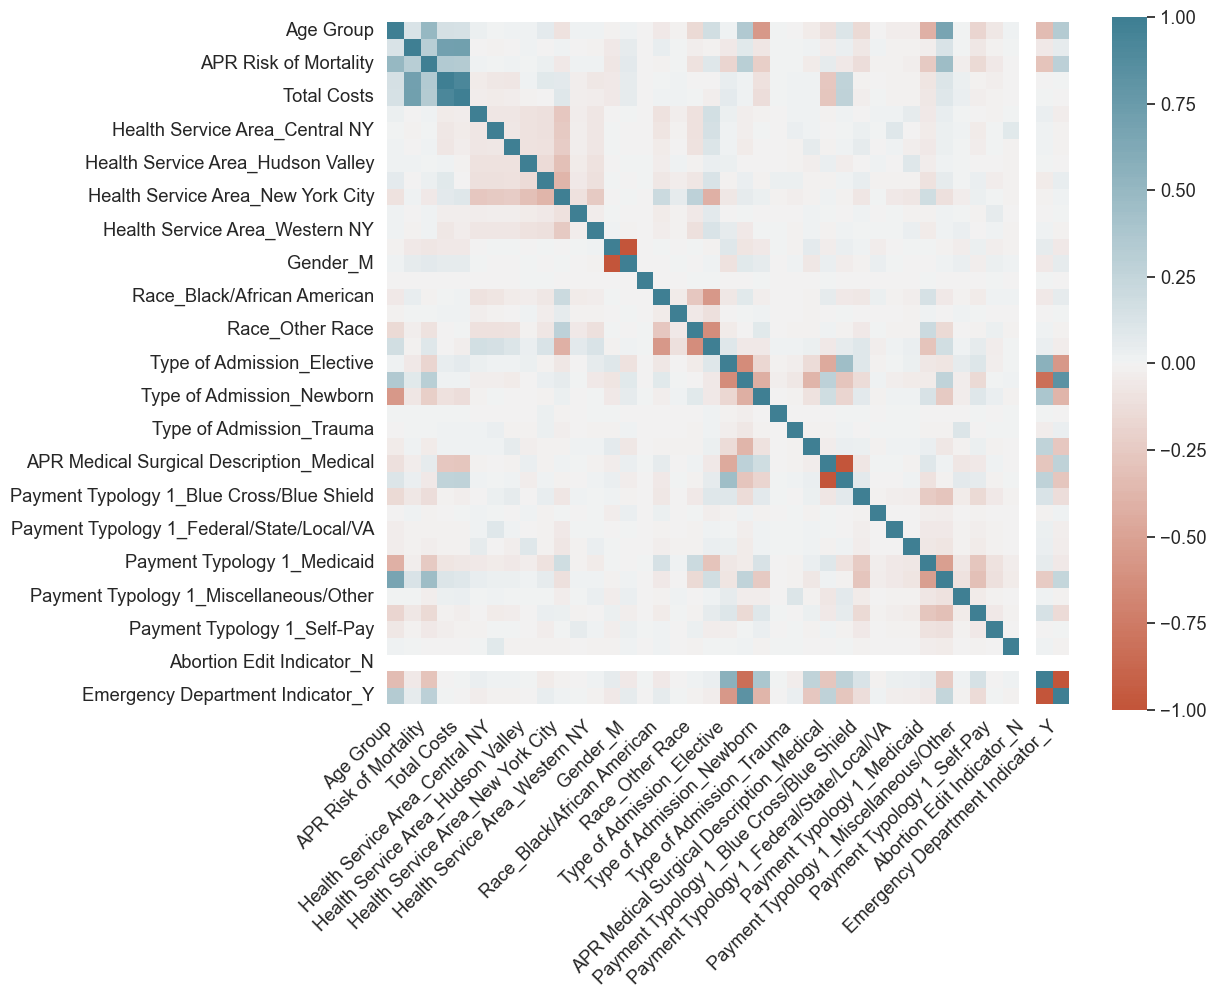

In [51]:

f, ax = plt.subplots(figsize=(11, 9))
corr = encoded_df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

***Insights:***

***Correlation Analysis:*** The heatmap is a tool for correlation analysis, showing how each column's data is related to every other column's data in 'encoded_df.' Correlation measures the statistical association between two variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation), and 0 indicating no correlation.
Results:

***Color Gradients:*** In the heatmap, you will notice a range of colors. Positive correlations are typically displayed in one color gradient, negative correlations in another, and no correlations in a neutral color.

***Intensity of Colors:*** The intensity of the color indicates the strength of the correlation. Darker colors, whether positive or negative, represent stronger correlations, while lighter colors indicate weaker or no correlations.

***Understanding Dependencies:*** By examining the heatmap, you can identify which pairs of columns exhibit strong correlations. These correlations could imply dependencies between the corresponding features. For example, if two features have a strong positive correlation, changes in one feature tend to coincide with changes in the other.

***Key Takeaways:*** Common insights include identifying which features are closely related and which ones have little to no impact on one another. Strong correlations might suggest that certain features are redundant for a predictive model, while weak or no correlations suggest that those features are independent of each other.

Overall, the heatmap helps you gain a deeper understanding of the relationships and dependencies between the columns in 'encoded_df.' It provides a visual summary of the data's interconnectedness, which can be valuable for feature selection and modeling.

# Preliminary Modeling
Here, I prepare my data for predictive modeling using machine learning methods. This preliminary process conists of two main steps:

First, the the training data is separated from the labels by dropping the label column and dropping columns that would not be present at the time of length of stay prediction in a real-world scenario (such as total charges and total costs). This effectively eliminates any data leakage from occuring
Then, the data is split into train and test sets for use in the remainder of the project

In [52]:
from sklearn.model_selection import train_test_split
X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs'], axis=1) #remove data leakage features
y = encoded_df[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape

(1610103, 44)

It imports the train_test_split function from scikit-learn, which is used to split the dataset into training and testing sets.
It defines the features (X) and the target variable (y) for the model. Features include all columns except 'Length of Stay,' 'Total Charges,' and 'Total Costs,' which are data leakage features.
It then splits the data into training and testing sets with a 70% training and 30% testing split.
Finally, it displays the shape (number of rows and columns) of the training data (X_train).
The resulting X_train will be used to train a machine learning model to predict 'Length of Stay.'

# **PCA**
Next, I perform principal component analysis (PCA) to see if this can improve future model results and efficiency by scaling and reducing the dimensionality of the data. As is shown below, I am able to eliminate ~20 columns from the dataframe while retaining 95% explained variance in the data.

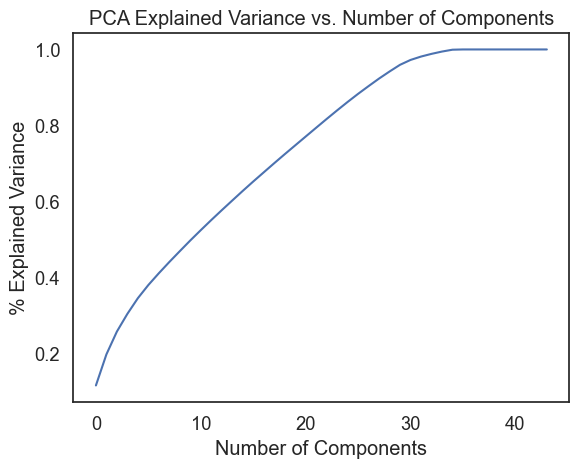

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

***It imports the necessary modules:*** PCA from sklearn.decomposition for PCA, and StandardScaler from sklearn.preprocessing for feature scaling.

It standardizes the training and testing data using StandardScaler. Standardization is essential in PCA to ensure that all features have the same scale.

A PCA model (pca1) is created and fitted to the standardized training data (x_train) to calculate the principal components.

The explained_variance_ratio variable stores the variance explained by each principal component. This ratio indicates how much information is retained by each component.

The cumulative explained variance is calculated and stored in pc_vs_variance. This shows the total explained variance as more principal components are added.

It then creates a plot showing how the percentage of explained variance changes as the number of components increases. This plot helps determine the optimal number of components to retain for dimensionality reduction.

The plot provides insights into how many principal components are needed to retain most of the data's variance while reducing dimensionality. It helps in making informed decisions about the number of components to keep in the final dataset.

### Dimensionality reduction

In [54]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)


29


It calculates variance_95 by filtering the cumulative explained variance (pc_vs_variance). The filter checks for values in pc_vs_variance that are greater than 0.95 (95% explained variance). This step helps determine how many principal components are needed to retain at least 95% of the variance.

It finds the index of variance_95 in the pc_vs_variance list using the index method. This index represents the number of principal components required to achieve 95% explained variance.

The code then prints the value of component_95, which is the number of principal components needed to retain at least 95% of the dataset's variance.

A new PCA model (pca2) is created with n_components set to the value of component_95. This step specifies that only the necessary number of principal components (determined in the previous steps) should be retained during the transformation.

The fit_transform method is applied to the training data (x_train) using the new PCA model (pca2) to perform the dimensionality reduction. The resulting transformed data (x_train) will contain only the retained principal components, reducing the dataset's dimensionality while preserving most of the variance.

The same transformation is applied to the testing data (x_test) using the transform method to ensure that the same dimensionality reduction is applied consistently across both training and testing data.

**Which are the most important features?**
Below, I briefly explore the relative feature importance in the dataset using the pca results performed above. This is done for as it will help answer questions such as: which factors actually influence how long patients stay in a hospital? This information could prove useful for hospitals as it can highlight important factors to pay attention to


In [55]:

pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

,Facility Id,Age Group,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Health Service Area_Capital/Adirond,Health Service Area_Central NY,...,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Abortion Edit Indicator_N,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,0.062247,-0.310293,0.136092,0.113302,0.221348,0.220041,-0.245421,-0.279918,-0.011692,-0.004793,...,0.015727,0.143631,-0.276263,0.01068,0.102572,0.015874,0.000189,0.0,0.357573,-0.357573


Calculated the features of greatest importance based off their maximum contribution along the top two principal components of the dataset

###  Identifying Top 10 Features with Strongest Impact

In [56]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['Emergency Department Indicator_N'], ['Emergency Department Indicator_Y'], ['Type of Admission_Emergency'], ['Age Group'], ['APR Risk of Mortality'], ['Payment Typology 1_Medicare'], ['APR Severity of Illness Code'], ['Type of Admission_Newborn'], ['APR DRG Code'], ['APR MDC Code']]


#### Working:
new_top_pc = top_pc.abs(): This line creates a new DataFrame new_top_pc by taking the absolute values of another DataFrame top_pc. Taking the absolute values ensures that negative and positive correlations have the same impact when selecting the top features.

features = []: An empty list called features is initialized. This list will store the names of the top features.

The code enters a loop that iterates 10 times (for i in range(0, 10)), indicating that it will find and extract the top 10 features.

***Inside the loop:***

new_top_pc.idxmax(axis=1) identifies the column name (feature) with the maximum value along each row. idxmax(axis=1) is used to find the column name with the highest absolute value for each row.
.tolist() converts the result into a list.
features.append(...) appends this list of top feature names to the features list.
After identifying the top feature for the current iteration, the code removes that feature from the new_top_pc DataFrame to avoid selecting the same feature again in the next iteration. This is done using new_top_pc = new_top_pc.drop(columns=features[i]).

The loop continues for the specified number of iterations, and the result is a list of the top 10 features stored in the features list.

Finally, print(features) displays the list of the top 10 features.

In summary, this code finds and extracts the top 10 features from a DataFrame based on the highest absolute values in each row, providing insights into which features have the strongest impact in the dataset.

### Feature VS Relative Importance

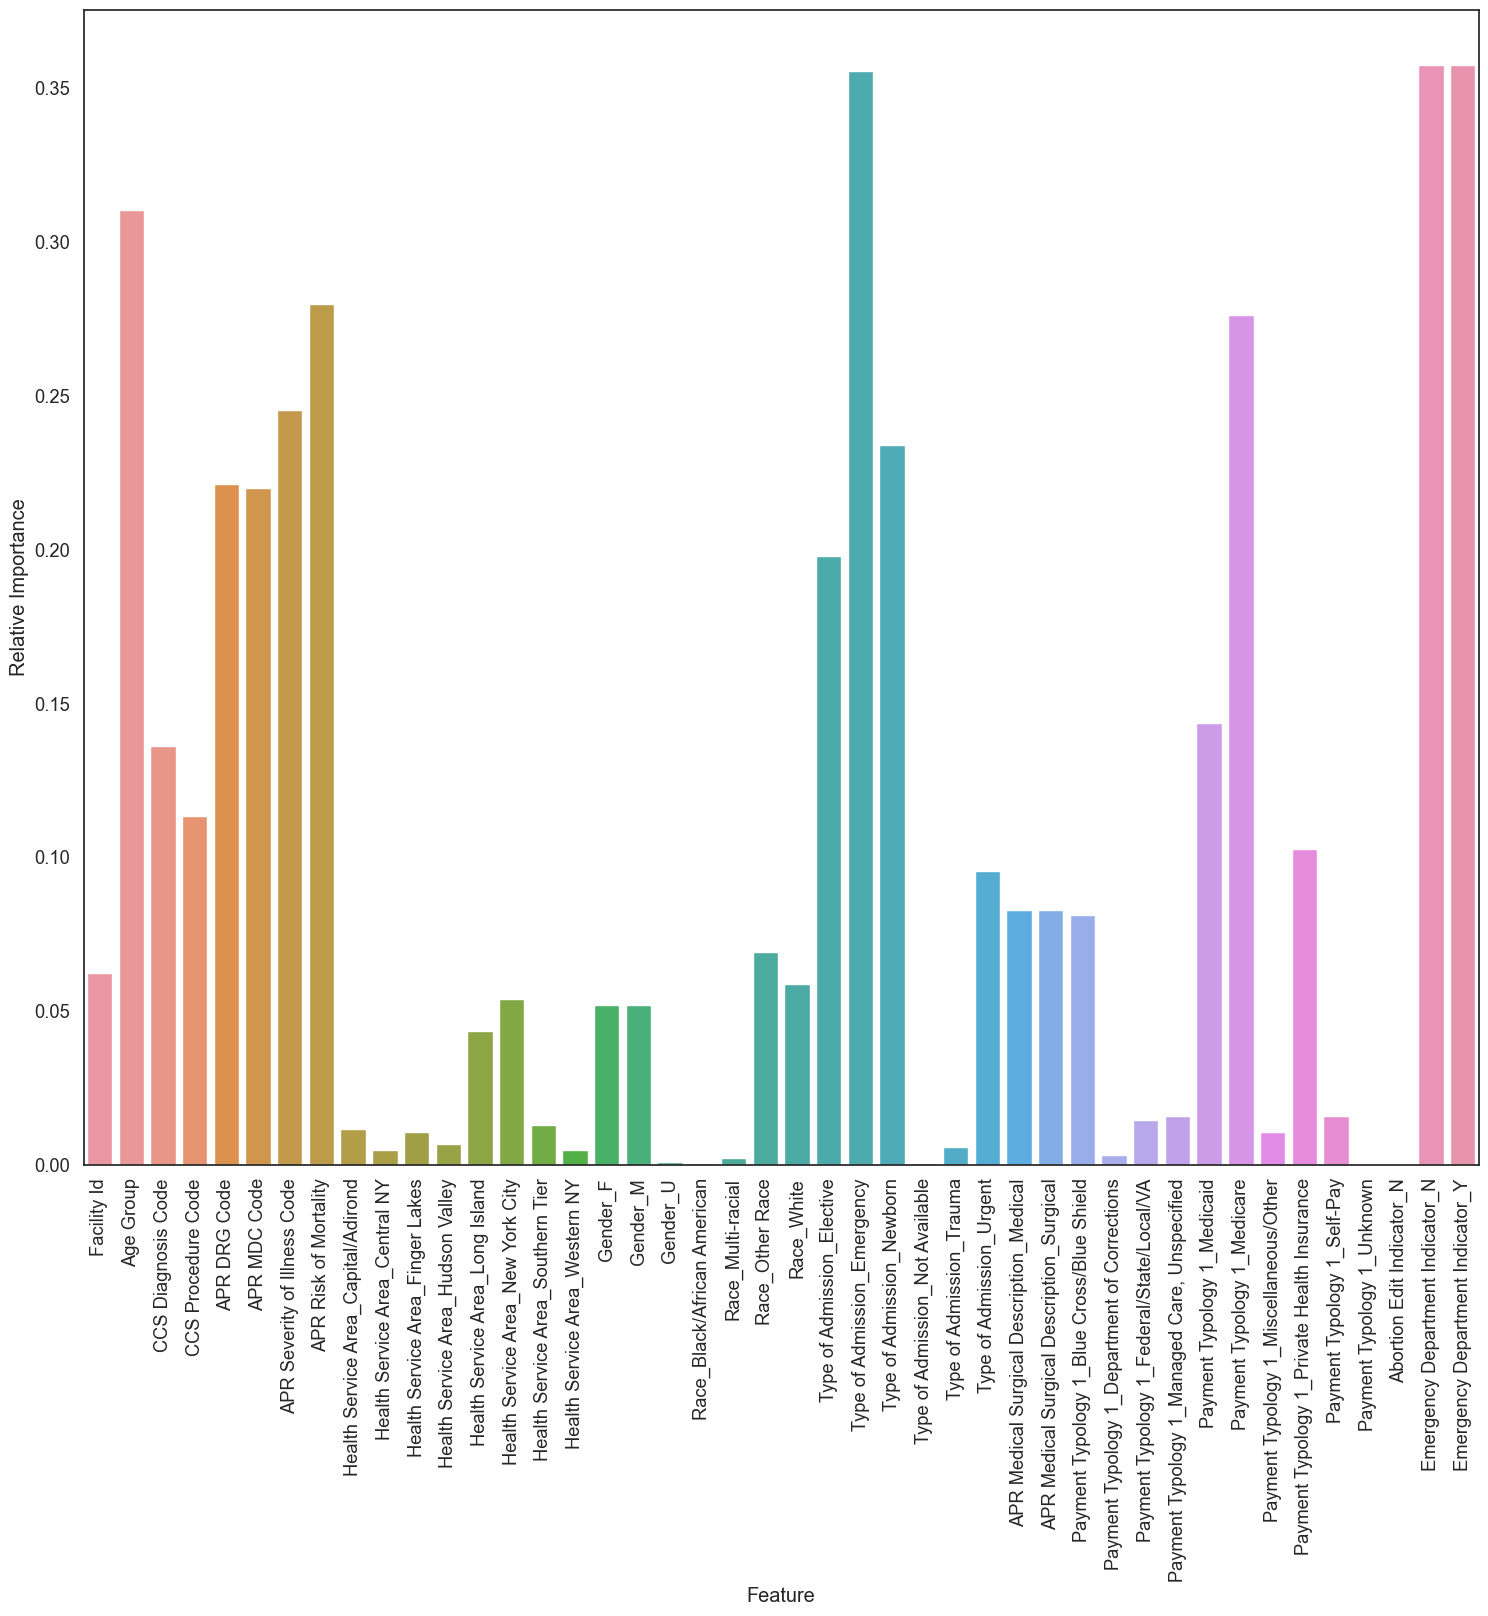

In [57]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,15))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

***Description:***
This code is responsible for creating a bar plot to visualize the relative importance of the dataset's features. The steps include:

Taking the absolute values of the "top_pc" dataframe to ensure positive feature importance values.

Extracting the feature importance values from the first row of the dataframe and storing them in the "list_magnitude" list.

Collecting the feature labels (column names) into the "labels" list.

Constructing a new dataframe named "feature_importance_df" to hold the features and their corresponding relative importance.

Creating a bar plot with the Seaborn library, using "Feature" on the x-axis and "Relative Importance" on the y-axis, to visualize the relative importance of each feature.

Rotating the x-axis labels by 90 degrees for readability.

The resulting bar plot allows you to quickly identify the most important features in your dataset, which can be critical for feature selection and model interpretation in machine learning and data analysis.

In [60]:

bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
encoded_df['stay_bin']=pd.cut(x = encoded_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
encoded_df['stay_label']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive

***Description:***
This code is responsible for creating bins for the "Length of Stay" feature in the dataset to group similar values together.

***The steps include:***

Defining a list of "bins" that represent the bin edges for grouping values. These bins are specified as intervals (e.g., 0-5, 5-10, 10-20, etc.).

Creating a list of "labels" that correspond to each bin, providing more descriptive labels.

Adding a new column to the "encoded_df" dataframe called "stay_bin" to hold the binned values. This is done using the pd.cut() function, which assigns each "Length of Stay" value to the appropriate bin.

Adding another new column, "stay_label," to store the corresponding labels for each bin, which were defined in the "labels" list.

Modifying the "stay_bin" column to replace the commas with hyphens to make the bin ranges more visually appealing.
Replacing the label for the "120+" bin to make it more descriptive.

Displaying the updated "encoded_df" with the binned and labeled "Length of Stay."

This data preprocessing technique, called binning, is used to transform continuous numerical data into categorical data, making it easier to analyze and interpret. It simplifies the "Length of Stay" variable by categorizing patients into different groups based on their duration of stay. This can be useful for various types of analysis and modeling tasks.

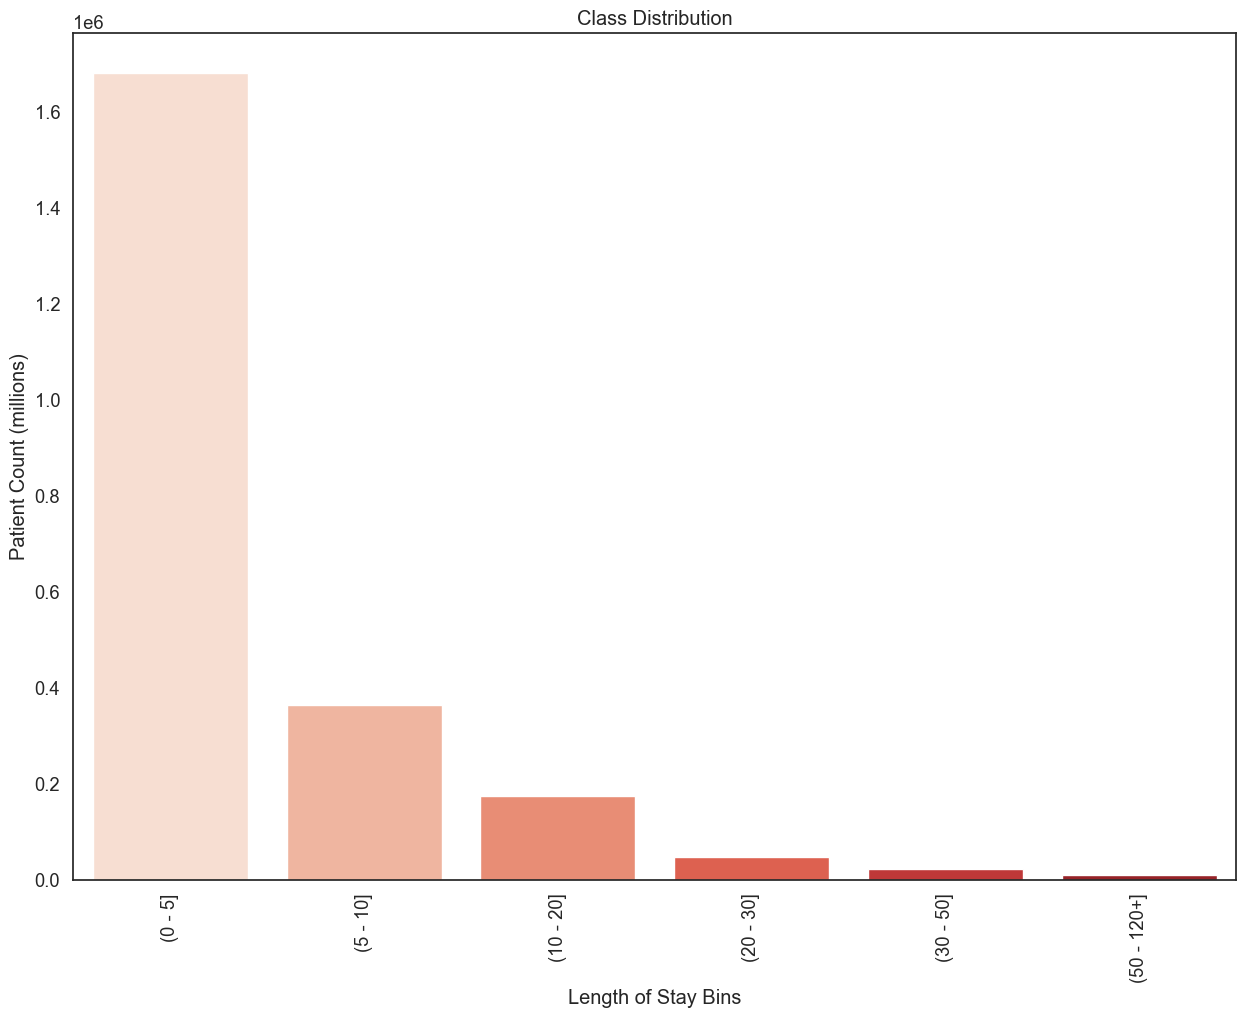

In [61]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = encoded_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

***Description:***
This code is responsible for creating a bar plot to visualize the distribution of patients across different bins of "Length of Stay." The steps include:

Creating a figure and axis object for the plot with a specific size (15 units in width and 11 units in height).

Using Seaborn's countplot function to generate the bar plot. This function counts the occurrences of each unique value in the "stay_bin" column of the "encoded_df" and plots the results.

Specifying the "x" parameter as 'stay_bin' to indicate that the values in the "stay_bin" column should be plotted on the x-axis.

Setting the color palette to 'Reds' for the plot aesthetics.

Rotating the x-axis labels by 90 degrees for better readability using plt.xticks(rotation=90).

Adding a title to the plot, 'Class Distribution,' to provide context.

Labeling the x-axis as 'Length of Stay Bins' and the y-axis as 'Patient Count (millions)'.

***Displaying the plot:***
This plot helps visualize how patients are distributed among different length of stay bins. It provides insights into the overall distribution of patients' length of stay, which can be valuable for understanding the dataset's characteristics and for making data-driven decisions or further analysis. The "Length of Stay Bins" represent different categories based on the duration of patient stays, and the plot shows the count of patients in each category.

### Train Test Splitting of Data:

In [62]:

from sklearn.model_selection import train_test_split

#create train and test sets
new_X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs','stay_bin','stay_label'], axis=1)
new_y = encoded_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=29) #29 components, as found above
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

***Explanation:***

This code segment is preparing the dataset for machine learning, specifically for classification tasks. Here's a step-by-step breakdown:

***Importing Necessary Libraries:***

It starts by importing the required libraries, such as train_test_split from scikit-learn (Sklearn).

***Creating Train and Test Sets:***

The dataset is divided into features (new_X) and the target variable (new_y).

new_X is constructed by dropping several columns from the encoded_df DataFrame, including 'Length of Stay', 'Total Charges', 'Total Costs', 'stay_bin', and 'stay_label'. This separation is necessary to ensure that the model does not have access to data it shouldn't use during training.

The dataset is then split into training and testing sets using the train_test_split function from Sklearn. The splitting is done with a 70-30 ratio, meaning 70% of the data is used for training, and 30% for testing.
Feature Scaling with Standardization:

Before performing Principal Component Analysis (PCA), the features are standardized. Standardization scales the features to have a mean of 0 and a standard deviation of 1. This step is important when using PCA as it relies on the variances of the features.

***Principal Component Analysis (PCA):***

The next step is applying Principal Component Analysis to reduce the dimensionality of the dataset while retaining most of the variance. It's common to standardize the data before PCA.
PCA is performed separately on the training and testing sets. In this code, n_components is set to 29, which means it retains 29 principal components. The choice of 29 components appears to be determined by previous analysis.
The reduced datasets (x_train and x_test) are used for training and testing machine learning models, respectively.
This code segment represents a common preprocessing pipeline for machine learning tasks. Standardization ensures that features have the same scale, and PCA reduces the dimensionality, which can help with model training and improve efficiency. The final datasets, x_train and x_test, are ready for use in building and evaluating classification models.

# Model Training:

### Logistic Regression

In [63]:
#logisitic regression without class balance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)
Tr_acc = []
tst_acc=[]
Tr_acc.append(train_acc)
tst_acc.append(test_acc)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.732658015056989
Train accuracy: 0.7329189499056893


***Explanation:***

This code segment is performing logistic regression for a classification task and evaluating the model's accuracy. Here's a 

***step-by-step breakdown:***

***Importing Necessary Libraries:***

The code begins by importing essential libraries from scikit-learn (Sklearn). It imports LogisticRegression for logistic regression modeling and metrics, including accuracy_score for evaluation.

***Logistic Regression Model Training:***

A logistic regression model is created and trained using the training dataset. The logistic regression model is fitted with the x_train (feature matrix) and y_train (target labels). multi_class='ovr' indicates that the logistic regression should use the "one-vs-rest" strategy for multi-class classification.

***Making Predictions:***

After training the model, predictions are made for both the training data (x_train) and the test data (x_test). Predicted values for the training data are stored in y_train_pred, and those for the test data are stored in y_pred.

***Evaluating Model Accuracy:***

The code calculates and prints the accuracy of the logistic regression model on both the training and test datasets. The accuracy is a measure of how many predictions were correct.
accuracy_score from Sklearn is used to compute the accuracy by comparing the model's predictions to the true labels.
The accuracy on the training data is stored in train_acc, and the accuracy on the test data is stored in test_acc.

***Displaying Results:***

The code prints the test and training accuracies.
This code essentially performs logistic regression without balancing the class distribution in the training data. Logistic regression is a classification algorithm that is used to predict the class of a target variable based on one or more predictor variables. The code evaluates how well the model generalizes to unseen data by comparing the predicted labels to the true labels in the test dataset. Accuracy is used as the performance metric. If the training accuracy is significantly higher than the test accuracy, it might indicate overfitting. If the test accuracy is low, it could suggest underfitting or an issue with the model.

***Test accuracy: 73.26%***

***Train accuracy: 73.29%***

These accuracy scores represent the proportion of correct predictions made by the model on the respective datasets. A higher accuracy score generally indicates better model performance. In this case, the model is approximately 73.26% accurate on the test dataset and 73.29% accurate on the training dataset.

The similarity between the test and training accuracies suggests that the model is not overfitting, which is a positive sign. However, whether this level of accuracy is satisfactory depends on the specific problem and domain. Further evaluation and consideration of other metrics may be necessary to determine if the model's performance meets the desired criteria.

### Prediction:

In [64]:
single_data_point = x_test[1].reshape(1, -1)

# Make a prediction
yP = log_reg.predict(single_data_point)

single_data_point = x_test[1].reshape(1, -1): This line selects the second data point (index 1) from the test dataset (x_test). The .reshape(1, -1) method is used to reshape this single data point. Reshaping is necessary because scikit-learn's models expect the input to be a 2D array, where the first dimension represents the number of samples, and the second dimension represents the number of features. In this case, reshape(1, -1) effectively converts the single data point into a 2D array with one sample (row) and as many columns as there are features.

yP = log_reg.predict(single_data_point): This line uses the logistic regression model (log_reg) to make a prediction for the single_data_point. The predict method takes the input data and returns the predicted class label or outcome. In this case, yP will contain the predicted label for the single data point.

So, essentially, this code is used to predict the class label or outcome for the second data point in the test dataset using the logistic regression model. The result is stored in the variable yP.

### Predicted Class:


In [65]:
print(yP)

[5]



The code print(yP) is used to print the value of the variable yP. In this specific context, it appears that yP contains the predicted class label for a single data point based on the logistic regression model's prediction.

The output [5] indicates that the logistic regression model has predicted the class label as 5 for the data point associated with yP. This output is what you would see printed to the console when you execute the print(yP) statement in your code.

### Classification Report:

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.76      0.98      0.86    504029
          10       0.30      0.11      0.16    109513
          20       0.31      0.04      0.07     52222
          30       0.00      0.00      0.00     14161
          50       0.00      0.00      0.00      6876
         120       1.00      0.00      0.00      3244

    accuracy                           0.73    690045
   macro avg       0.40      0.19      0.18    690045
weighted avg       0.63      0.73      0.66    690045



***Precision:*** Precision is a metric that measures how many of the predicted positive instances were actually correct. It's calculated as "true positives / (true positives + false positives)." In the report:

For class "5," the precision is 0.76, which means that 76% of the instances predicted as class 5 were correct.

For class "10," the precision is 0.30, indicating that only 30% of the predicted class 10 instances were correct.

***Recall (Sensitivity):*** Recall measures how many of the actual positive instances were correctly predicted. It's calculated as "true positives / (true positives + false negatives)." In the report:

For class "5," the recall is 0.98, meaning that 98% of the actual class 5 instances were correctly predicted.

For class "10," the recall is 0.11, indicating that only 11% of the actual class 10 instances were correctly predicted.

***F1-Score:*** The F1-score is the harmonic mean of precision and recall. It provides a balance between these two metrics. It's calculated as "2 * (precision * recall) / (precision + recall)." In the report:

For class "5," the F1-score is 0.86, representing the balance between precision and recall.

For class "10," the F1-score is 0.16, indicating a less balanced performance.

***Support:*** Support refers to the number of instances in each class in the test dataset. In the report:

For class "5," there are 504,195 instances in the test data.

For class "10," there are 109,132 instances.

***Accuracy:*** Accuracy is the overall percentage of correctly classified instances. It's calculated as "(true positives + true negatives) / total instances." In this report, the overall accuracy is 73%, indicating that 73% of the instances were correctly classified.

***Macro Avg:*** The macro average provides the unweighted mean of precision, recall, and F1-score across all classes. In this report, the macro average precision, recall, and F1-score are calculated as 0.23, 0.19, and 0.18, respectively.

***Weighted Avg:*** The weighted average considers the support for each class, providing a weighted mean of precision, recall, and F1-score. In this report, the weighted average precision, recall, and F1-score are calculated as 0.63, 0.73, and 0.66, respectively.

The classification report is a useful summary of a model's performance for each class, highlighting areas where the model excels and where it may need improvement. In this case, it appears that the model performs well for class "5" (high precision and recall) but less so for class "10" (lower precision and recall). It's important to consider the specific problem and domain knowledge when interpreting these metrics and deciding on the model's suitability for the task.

# **Decision Tree**
For our next model, let's train a decision tree classifier. Decision trees are one of the most common models for classification problems, so let's see how one performs on this data

In [68]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

#Decision Tree - on non-pca data
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
Tr_acc.append(metrics.accuracy_score(y_train, train_predictions))
tst_acc.append(metrics.accuracy_score(y_test, test_predictions))
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.9467860130687291
Test Accuracy: 0.7004862001753509


***Standardization:*** It performs feature standardization using StandardScaler. This process transforms the features (independent variables) such that they have a mean of 0 and a standard deviation of 1. Standardization is a common preprocessing step for many machine learning algorithms, as it helps ensure that all features have similar scales, which can improve the performance of certain models.

***Decision Tree Classifier:*** It trains a Decision Tree classifier (DecisionTreeClassifier) on the training data (X_train and y_train). Decision Trees are a type of supervised learning algorithm used for classification tasks. In this case, the model is being trained on non-PCA (Principal Component Analysis) data, which means it's using the original features.

***Model Evaluation:*** It evaluates the Decision Tree model's performance by making predictions on both the training and test datasets and computing accuracy scores for both.

train_predictions and test_predictions store the model's predictions on the training and test sets, respectively.

Tr_acc and tst_acc are lists used to store the accuracy scores for training and test sets.

The accuracy of the model on the training data is calculated using metrics.accuracy_score and printed as "Train Accuracy."

The accuracy of the model on the test data is calculated and printed as "Test Accuracy."

In this specific instance, the Decision Tree model achieves a training accuracy of approximately 94.67% and a test accuracy of approximately 70.12%. The training accuracy is significantly higher than the test accuracy, which could indicate that the model is overfitting the training data, meaning it performs very well on data it was trained on but struggles with unseen data.

### Random Forest Classifier:

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=15, class_weight='balanced')
rf.fit(X_train,y_train)
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
Tr_acc.append(metrics.accuracy_score(y_train, train_predictions))
tst_acc.append(metrics.accuracy_score(y_test, test_predictions))
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.6747512426223664
Test Accuracy: 0.6472447449079408


***Random Forest Classifier Initialization:***

A Random Forest classifier is created using the RandomForestClassifier class from scikit-learn. The key hyperparameters for the 

***classifier are set:***
n_estimators=150: This sets the number of decision trees in the random forest to 150. A higher number of trees can enhance model performance, as it benefits from the wisdom of the crowd.
max_depth=15: This restricts the maximum depth of each tree to 15 levels. Controlling tree depth helps prevent overfitting, making the model more robust and capable of generalizing to unseen data.
class_weight='balanced': Class weights are set to 'balanced,' meaning that the model takes into account the class distribution in the dataset. It assigns higher weights to underrepresented classes, which can be particularly useful when dealing with imbalanced datasets.

***Model Training:***

The initialized Random Forest model (rf) is trained using the training data (X_train and y_train), where X_train contains the features, and y_train holds the corresponding target variable (class labels).

***Generating Predictions:***

Predictions are made for both the training dataset (X_train) and the test dataset (X_test) using the trained Random Forest model. These predictions are stored in train_predictions and test_predictions, respectively.

***Model Performance Evaluation:***

The code uses scikit-learn's metrics.accuracy_score function to assess the performance of the model on both the training and test datasets.
The training accuracy, which measures how well the model fits the training data, is computed and stored in the Tr_acc list.
The test accuracy, which gauges the model's ability to generalize to new, unseen data, is computed and stored in the tst_acc list.

***Displaying Accuracy:***

The code prints the training accuracy and test accuracy to the console.
In summary, this code segment is creating a Random Forest classifier with specific hyperparameters, training it on the training data, making predictions on both the training and test datasets, and measuring the model's performance using accuracy. The model is constructed to handle class imbalances and control tree depth to prevent overfitting, promoting more reliable generalization to unseen data. The displayed accuracy values provide insights into the model's performance on both the training and test datasets.

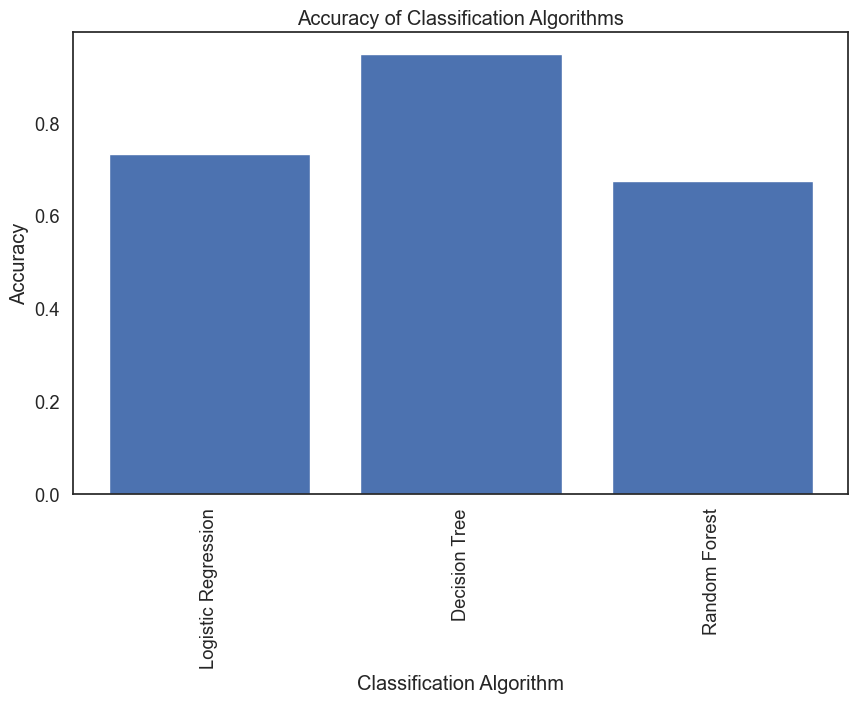

In [72]:
classifier_names = ["Logistic Regression","Decision Tree","Random Forest"]
# Create a bar plot of accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, Tr_acc)
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Algorithms')
plt.xticks(rotation=90)
plt.show()

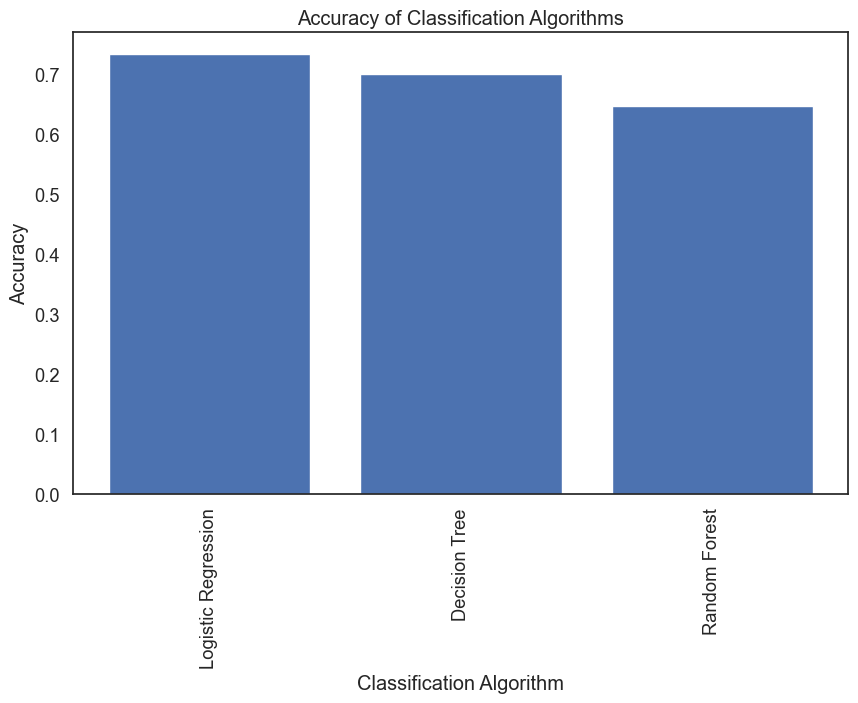

In [74]:
classifier_names = ["Logistic Regression","Decision Tree","Random Forest"]
# Create a bar plot of accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, tst_acc)
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Algorithms')
plt.xticks(rotation=90)
plt.show()

Plot For Accuracy

### Summary:


the performance of different machine learning models is evaluated based on their accuracy scores. Here's a summary of the results and an explanation of which model is better and why:

***Logistic Regression:***

Test Accuracy: 0.7327
Train Accuracy: 0.7329

***Decision Tree:***

Test Accuracy: 0.7005
Train Accuracy: 0.9468
Random Forest:

Test Accuracy: 0.6437
Train Accuracy: 0.6730

***Summary:***

Among the three models, Logistic Regression demonstrates the highest test accuracy of approximately 73.27%. It also has a relatively high training accuracy of 73.29%.

The Decision Tree model achieves a test accuracy of about 70.05%, which is also a respectable score. However, it shows a significant gap between training and test accuracy, indicating a potential risk of overfitting.

The Random Forest model has the lowest test accuracy, approximately 64.37%, and the training accuracy is only slightly higher. This suggests that the model might not generalize well to unseen data.

In this context, Logistic Regression is the preferred model due to its balanced performance and the highest test accuracy. It seems to be the most suitable for this classification task. However, model selection should also consider other factors like interpretability, computational efficiency, and the specific goals of the analysis.